## Poor mans compartment labelling

In [9]:
import pandas
import numpy as np

In [10]:
cell_df = pandas.read_csv("smo_data/cell_type_classification.csv", index_col=0)
soma_df = pandas.read_csv("smo_data/soma.csv")
cws_df = soma_df.merge(right=cell_df, right_on="cell_segid",left_on="pt_root_id")

In [11]:
astro_mitos = pandas.read_csv("smo_data/astro_mito.csv")

In [12]:
compartment_df = astro_mitos.reset_index().merge(right=cws_df, left_on="cellid", right_on="pt_root_id").set_index("mito_id", drop=True)

In [13]:
compartment_df.head(1)

,index,Unnamed: 0_x,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,...,soma_x_nm,soma_y_nm,soma_z_nm,nuc_id,centroid_x,centroid_y,centroid_z,cell_segid,cell_type_y,cell_subtype
mito_id,,,,,,,,,,,,,,,,,,,,,
809674,0,19,1280360,57366,67234,44,56430,66442,21,58286,...,213532,248116,14160,8589,53136,62176,320,648518346349536487,glia,astrocyte


In [14]:
MITO_CENTROIDS = [ "ctr_pos_{:s}_vx".format(coord) for coord in "xyz"]
MITO_POS_NM = [ "mito_{:s}_nm".format(coord) for coord in "xyz"]
SOMA_POS_NM = [ "soma_{:s}_nm".format(coord) for coord in "xyz"]
SOMA_POS_NM_CORR = [ "soma_{:s}_nm_corr".format(coord) for coord in "xyz"]

VOX_TO_NM = [3.58, 3.58, 40]
VOX_SCALING = np.array(VOX_TO_NM)/np.array([4.0,4.0,40.0])

DISTANCE_TO_SM = "distance_to_soma"

In [17]:
compartment_df.loc[:, MITO_POS_NM] = compartment_df.loc[:, MITO_CENTROIDS].values*np.array(VOX_TO_NM)
compartment_df.loc[:, SOMA_POS_NM_CORR] = compartment_df.loc[:, SOMA_POS_NM].values*np.array(VOX_SCALING)

In [18]:
compartment_df.loc[:, DISTANCE_TO_SM] = compartment_df.apply(lambda sr: np.linalg.norm(sr[MITO_POS_NM].values-sr[SOMA_POS_NM_CORR].values), axis=1)

In [19]:
compartment_df.loc[:,MITO_CENTROIDS+MITO_POS_NM+["pt_position"]+SOMA_POS_NM_CORR].head(2)

,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,mito_x_nm,mito_y_nm,mito_z_nm,pt_position,soma_x_nm_corr,soma_y_nm_corr,soma_z_nm_corr
mito_id,,,,,,,,,,
809674,57366,67234,44,205370.28,240697.72,1760.0,[53383 62029 354],191111.14,222063.82,14160.0
809906,56696,66806,201,202971.68,239165.48,8040.0,[53383 62029 354],191111.14,222063.82,14160.0


In [20]:
compartment_df.loc[:, [DISTANCE_TO_SM]].describe()

,distance_to_soma
count,10577.000000
mean,22044.608009
std,16534.173235
min,1530.623560
25%,12020.866271
50%,19553.272294
75%,27667.638667
max,157008.241653


In [21]:
import seaborn

<AxesSubplot:xlabel='distance_to_soma', ylabel='Proportion'>

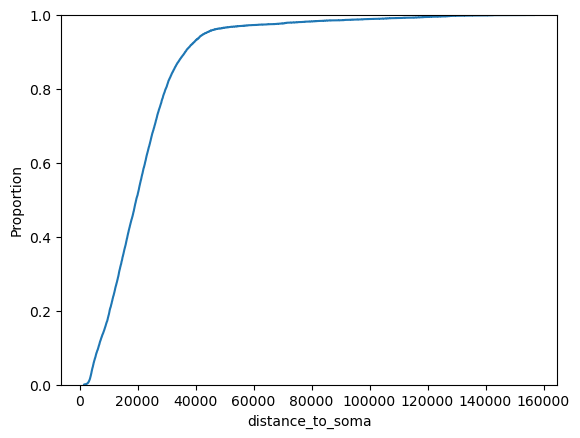

In [22]:
seaborn.ecdfplot(data=compartment_df, x="distance_to_soma")

From neuroglancer, it seems that astro nuclei are about 10um in diameter. What is also visible is that their processes expand up to 60-70 um, but that sometimes there are merge errors with axons, also mentioned in the Turner, 2019 paper. 

For a nice view of all nuclei, see [here](https://neuromancer-seung-import.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v0/son_of_alignment_v15_rechunked%22%2C%22type%22:%22image%22%2C%22blend%22:%22default%22%2C%22shaderControls%22:%7B%7D%2C%22name%22:%22EM%22%7D%2C%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v185/seg%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.51%2C%22objectAlpha%22:0.18%2C%22segments%22:%5B%22648518346349517141%22%2C%22648518346349524139%22%2C%22648518346349525715%22%5D%2C%22hiddenSegments%22:%5B%22648518346349527319%22%2C%22648518346349530569%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22cell_segmentation_v185%22%7D%2C%7B%22source%22:%22precomputed://https://td.princeton.edu/sseung-archive/pinky100-mito/seg_191220%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22mitochondria%22%2C%22visible%22:false%7D%2C%7B%22source%22:%22precomputed://https://td.princeton.edu/sseung-archive/pinky100-nuclei/seg%22%2C%22type%22:%22segmentation%22%2C%22segments%22:%5B%2211782%22%2C%2213913%22%2C%223554%22%2C%224308%22%2C%224766%22%2C%225709%22%2C%226542%22%2C%226881%22%2C%227533%22%2C%228583%22%2C%228589%22%2C%228604%22%2C%228656%22%2C%229080%22%2C%229655%22%2C%229689%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22nuclei%22%7D%2C%7B%22source%22:%22precomputed://https://td.princeton.edu/sseung-archive/pinky100-clefts/mip1_d2_1175k%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22synapses%22%2C%22visible%22:false%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B4%2C4%2C40%5D%2C%22voxelCoordinates%22:%5B101884.8203125%2C50356.05859375%2C98.6539306640625%5D%7D%7D%2C%22zoomFactor%22:89.67456883871074%7D%2C%22perspectiveOrientation%22:%5B-0.33984020352363586%2C0.6160993576049805%2C-0.5182574987411499%2C0.48614752292633057%5D%2C%22perspectiveZoom%22:6593.821553432497%2C%22showSlices%22:false%2C%22selectedLayer%22:%7B%22layer%22:%22cell_segmentation_v185%22%2C%22visible%22:true%7D%2C%22layout%22:%7B%22type%22:%22xy-3d%22%2C%22orthographicProjection%22:true%7D%7D)

In [23]:
SOMA_RADIUS=7000
MAX_EXTENT=70000

In [24]:
compartment_df.loc[:, "compartment"] = compartment_df["distance_to_soma"].apply(lambda x: "Soma" if x<=SOMA_RADIUS else ("Branch" if x<MAX_EXTENT else "Far" ))

In [25]:
compartment_df.groupby(by="cellid").apply(lambda df: df["compartment"].value_counts())

cellid                    
648518346342795947  Branch     627
                    Soma        99
                    Far          5
648518346349386860  Branch     643
                    Soma        48
648518346349498574  Branch     702
                    Soma        99
                    Far         51
648518346349517141  Branch    1370
                    Soma       109
                    Far         16
648518346349521344  Branch     240
                    Soma       113
648518346349524139  Branch     504
                    Far        131
                    Soma        97
648518346349525544  Branch    1034
                    Soma        58
                    Far          2
648518346349525862  Branch     385
                    Soma       102
                    Far          4
648518346349527316  Branch     472
                    Soma        53
648518346349527319  Branch     828
                    Soma        37
                    Far          3
648518346349528249  Branch  

In [26]:
inh_mito = pandas.read_csv("smo_data/inh_mito_extrastats.csv", index_col=0)

KEYS = [k for k in inh_mito.keys().values if k not in ["surface_area", "complexityindex"]]

morpho_df = pandas.read_csv("smo_data/astro_mito_morphometrics.csv", index_col=0)

compartment_df.loc[:, "pathlength"] = morpho_df.loc[compartment_df.index.values, "PC1 Length"]

KeyError: '[809674, 809906, 793934, 799638, 700866, 695455, 690138, 802761, 1038691, 684601, 922049, 804902, 819218, 695744, 907400, 700806, 696181, 803322, 794637, 700307, 800320, 814050, 809673, 818798, 794302, 696010, 694986, 803187, 684827, 818145, 927294, 694799, 807848, 693992, 814163, 804343, 802727, 690351, 808485, 916456, 804174, 822788, 803274, 694778, 684786, 700895, 803424, 808428, 689842, 932321, 813718, 809640, 695854, 685172, 814344, 690614, 814429, 700523, 700888, 690103, 808327, 809171, 695506, 696154, 818569, 809279, 916653, 690570, 695092, 921588, 803667, 813089, 921149, 690429, 916218, 794757, 694656, 694244, 916560, 696110, 695475, 689978, 808967, 794655, 799531, 932086, 800279, 819164, 700268, 695470, 808004, 700243, 689162, 814222, 808658, 694921, 700539, 808644, 694747, 689706, 695180, 809211, 695318, 799768, 799514, 927224, 690809, 916313, 695899, 804365, 822664, 690547, 694443, 1145438, 684474, 925866, 696068, 808402, 926668, 818255, 694907, 690609, 809700, 809529, 921131, 694878, 690464, 799437, 1145959, 799769, 808180, 808990, 700579, 694770, 694994, 690183, 685319, 798502, 694880, 695401, 699971, 1032118, 822967, 809004, 694924, 695267, 690696, 800060, 808718, 690587, 695570, 814250, 822948, 808060, 690616, 808606, 690009, 925799, 803478, 684826, 794166, 802867, 685308, 807876, 814129, 695007, 817374, 819225, 695661, 799546, 818510, 690580, 685647, 1038746, 799145, 695410, 1032427, 694374, 1033428, 800093, 694995, 695006, 695043, 921792, 694597, 695127, 694533, 695091, 694613, 902638, 800030, 818633, 700255, 916030, 694873, 695628, 809000, 814406, 694678, 694820, 814095, 684631, 818380, 694229, 798562, 699902, 807734, 799661, 921357, 818346, 694436, 921197, 689979, 690648, 694572, 695442, 814179, 690363, 695756, 902921, 694700, 695373, 817318, 699909, 690661, 690083, 690271, 690241, 907692, 690575, 685520, 802893, 921964, 921617, 818261, 1032405, 694897, 684612, 794376, 802730, 690736, 922154, 799939, 1027449, 809536, 814596, 700033, 700241, 799509, 809098, 690182, 700205, 695075, 805079, 822991, 695178, 808135, 690158, 694744, 689859, 921298, 804268, 695133, 695754, 690258, 907380, 695017, 695559, 912187, 695648, 813969, 926444, 695945, 684662, 804321, 916174, 694282, 809124, 700191, 1033231, 916093, 693972, 1038575, 799751, 927810, 814279, 809620, 799631, 818307, 694577, 695247, 814348, 822904, 700001, 695109, 690298, 809288, 685379, 916041, 813518, 694960, 812968, 694425, 684579, 699686, 822549, 814330, 695718, 799544, 799452, 921798, 808351, 794809, 1027523, 922848, 690433, 921767, 690109, 694622, 694638, 694795, 799352, 1032472, 695072, 695333, 922229, 814458, 921048, 799082, 916559, 794408, 1027425, 921286, 1032690, 808948, 689609, 690613, 794565, 916295, 813642, 1032963, 813672, 1027448, 690366, 690348, 813838, 793223, 807980, 695246, 814213, 694999, 1031983, 813835, 690515, 694188, 803893, 822569, 684479, 915931, 695626, 814460, 799140, 808469, 921975, 794389, 1027140, 1031944, 1031886, 694769, 1032293, 694497, 695624, 814004, 808924, 922015, 921597, 809008, 911550, 690021, 809003, 916325, 932123, 1027162, 690204, 799069, 926038, 911783, 798847, 695147, 684534, 917011, 808625, 1031903, 809470, 813207, 808587, 921774, 921771, 695184, 809330, 695448, 1032578, 689778, 693979, 794084, 799732, 927512, 700773, 818350, 925766, 1033142, 807820, 1037462, 699931, 925968, 813418, 809244, 921966, 695412, 1032103, 804400, 1037646, 813862, 814253, 809334, 694984, 694491, 689935, 921970, 926231, 699527, 808064, 1032036, 917263, 808521, 932164, 808114, 699841, 1037614, 1026848, 804016, 694021, 1377605, 1617851, 1162056, 1163671, 1735220, 1041256, 1153222, 1270631, 1270619, 1372701, 1735381, 1497614, 1264702, 1157280, 1259560, 1501345, 1275163, 1274780, 1158216, 1158155, 1376787, 1156973, 1157374, 1151476, 1617757, 1270737, 1270733, 1158308, 1270723, 1158283, 1386981, 1734069, 1734272, 1383773, 1152819, 1386530, 1617586, 1376305, 1734194, 1733812, 1734957, 1501785, 1270569, 1383714, 1734443, 1617575, 1734652, 1377055, 1383674, 1156919, 1152820, 1495710, 1734181, 1617604, 1734452, 1501676, 1152795, 1733953, 1616816, 1847282, 1156788, 1274898, 1617117, 1502094, 1152813, 1735478, 1734661, 1495971, 1500646, 1268653, 1269032, 1847419, 1612938, 1734275, 1502070, 1268921, 1617271, 1733924, 1378149, 1147939, 1734012, 1275523, 1617784, 1496254, 1733960, 1617691, 1853539, 1269545, 1376543, 1386512, 1617804, 1500242, 1733743, 1275350, 1733731, 1616637, 1733713, 1734291, 1496014, 1376538, 1734022, 1269054, 1617347, 1152778, 1383617, 1386842, 1264720, 1500778, 1733668, 1388337, 1386510, 1383630, 1381614, 1377740, 1617473, 1617648, 1734123, 1852407, 1268263, 1158249, 1264906, 1734044, 1733756, 1269850, 1275524, 1733730, 1733919, 1377822, 1387086, 1617273, 1847735, 1851943, 1383549, 1852249, 1275629, 1617167, 1616825, 1269705, 1733670, 1495761, 1734262, 1490672, 1275009, 1501480, 1376630, 1733852, 1270221, 1269620, 1617072, 1496529, 1376490, 1152851, 1501338, 1268773, 1852764, 1376607, 1495939, 1617541, 1495652, 1270624, 1270499, 1733901, 1250236, 1734000, 1734085, 1847355, 1264706, 1263435, 1372524, 1382066, 1617553, 1387065, 1387440, 1382240, 1970907, 1383525, 1496481, 1734393, 1734097, 1733935, 1852866, 1382079, 1733914, 1467882, 1376516, 1263644, 1852941, 1501616, 1501629, 1386852, 1378141, 1158171, 1163534, 1734158, 1383715, 1501686, 1490699, 1467979, 1733868, 1274791, 1735287, 1734732, 1153002, 1617799, 1733929, 1152931, 1358045, 1376595, 1041233, 1269491, 1382534, 1163105, 1386513, 1501949, 1376430, 1734346, 1496412, 1617207, 1386837, 1731174, 1501299, 1467513, 1617665, 1734816, 1495483, 1157412, 1730625, 1152925, 1156964, 1158188, 1264319, 1617176, 1269650, 1734540, 1275609, 1734050, 1617455, 1268484, 1852803, 1381665, 1378053, 1616508, 1382602, 1495758, 1617766, 1616871, 1250259, 1617464, 1269407, 1617737, 1268916, 1270572, 1501964, 1734171, 1734373, 1496251, 1733765, 1733911, 1617548, 1616438, 1734080, 1734945, 1852385, 1269004, 1616447, 1852376, 1386291, 1852519, 1501939, 1270241, 1161608, 1269699, 1617333, 1733671, 1846730, 1268898, 1495513, 1162442, 1734082, 1040464, 1617050, 1264806, 1264598, 1468046, 1731085, 1733848, 1497389, 1734209, 1495730, 1496933, 1158044, 1152859, 1847238, 1616886, 1268781, 1040997, 1617234, 1157424, 1733893, 1386682, 1733797, 1263931, 1382825, 1616577, 1147830, 1268394, 1847660, 1376446, 1148040, 1734079, 1156369, 1617542, 1372192, 1378177, 1270613, 1734314, 1852465, 1268453, 1500989, 1041406, 1268465, 1734824, 1734746, 1156941, 1158139, 1273816, 1734972, 1377992, 1381625, 1041041, 1377855, 1383546, 1735219, 1372196, 1377071, 1157977, 1269842, 1496876, 1269492, 1617579, 1497413, 1383606, 1152777, 1269761, 1147625, 1157417, 1501550, 1259489, 1381963, 1383625, 1501248, 1377262, 1852834, 1501780, 1382009, 1270022, 1386726, 1383550, 1852096, 1386547, 1734025, 1383717, 1269530, 1383128, 1157861, 1274513, 1370971, 1262970, 1495912, 1377643, 1852523, 1617284, 1268303, 1734106, 1387069, 1040877, 1970909, 1852348, 1386302, 1501892, 1381981, 1161715, 1269462, 1501340, 1501253, 1386313, 1147502, 1270512, 1158033, 1501220, 1264383, 1734672, 1274286, 1852948, 1734453, 1617350, 1157375, 1617236, 1734325, 1496198, 1491333, 1846881, 1733764, 1611360, 1496327, 1163061, 1616834, 1157688, 1381725, 1495681, 1500618, 1617429, 1617673, 1616976, 1382426, 1046010, 1051700, 1495656, 1382984, 1372023, 1268602, 1382549, 1485498, 1733769, 1262999, 1381903, 1501400, 1152471, 1495904, 1734221, 1491494, 1381985, 1264161, 1377378, 1152990, 1734225, 1041034, 1616401, 1382524, 1041000, 1734674, 1157929, 1377694, 1501793, 1376940, 1147771, 1734632, 1383410, 1157914, 1162456, 1730678, 1377500, 1157032, 1377751, 1847821, 1387727, 1269896, 1377612, 1157903, 1496016, 1269521, 1386272, 1383228, 1269442, 1733981, 1264051, 1264977, 1152835, 1376395, 1386445, 1377647, 1269804, 1051796, 1264203, 1051953, 1501390, 1501591, 1269869, 1734655, 1270113, 1496278, 1734286, 1273746, 1152755, 1148027, 1268687, 1372461, 1269070, 1381935, 1377107, 1263695, 1161997, 1377512, 1495592, 1382888, 1496869, 1039878, 1156904, 1616732, 1157357, 1497039, 1040631, 1263694, 1269675, 1496858, 1501403, 1495642, 1386485, 1381991, 1377481, 1496266, 1734292, 1157337, 1376529, 1273945, 1501437, 1377744, 1371632, 1495599, 1263485, 1734089, 1490817, 1157621, 1381875, 925473, 920455, 930179, 1143611, 1031255, 1148323, 1148285, 1259748, 697965, 920355, 1034136, 693226, 920554, 924677, 1021410, 1146954, 707838, 930698, 812422, 919229, 913747, 1148231, 925303, 913914, 1251002, 1148026, 596317, 914358, 1260087, 1259112, 925496, 919781, 914009, 1029958, 812284, 920351, 713110, 925466, 702500, 915666, 923641, 1148283, 821681, 919567, 820860, 806515, 708003, 702541, 1046343, 595970, 698336, 591363, 708139, 1367526, 1362568, 925416, 925477, 1253677, 1030329, 1147702, 1041082, 925337, 1039905, 920208, 821236, 925468, 925356, 697398, 925417, 1148289, 930578, 1250909, 1036108, 1253508, 1259278, 1254350, 1148310, 925210, 1031321, 1147011, 1371236, 606585, 925450, 925452, 1020446, 1362883, 821800, 1146879, 918984, 1146903, 1046403, 595804, 1034411, 703241, 930177, 1034108, 935155, 1361118, 1034043, 595785, 1040786, 924962, 1041002, 1035206, 1046317, 1377494, 1039850, 1148173, 1033970, 1151899, 925462, 1029297, 1253959, 806458, 1040685, 703004, 1029243, 1249895, 821040, 930363, 925423, 929792, 815585, 706371, 930493, 1034153, 929992, 918604, 924976, 1147930, 821637, 930243, 1040177, 930044, 925209, 820881, 1039602, 1034000, 1039437, 1039259, 812469, 1257986, 1254841, 925239, 1137425, 1142863, 1034066, 703224, 1036034, 920251, 919793, 1040759, 929371, 1046702, 1151236, 821361, 1030283, 805391, 1045271, 1151813, 1033984, 812151, 919770, 1030193, 1377225, 919536, 1034219, 1146733, 811025, 930707, 930395, 815636, 1036015, 811604, 1034170, 930189, 1147329, 811558, 801349, 707461, 925169, 811308, 801312, 930459, 919767, 929356, 1036146, 811697, 805861, 930447, 930759, 1029173, 930093, 925045, 1045359, 1142934, 930159, 811364, 919849, 1034114, 1033985, 930046, 1147796, 930383, 697308, 914621, 919654, 1034619, 806729, 924481, 1044713, 918807, 811503, 925401, 706359, 815144, 1254867, 1034924, 1039526, 1041394, 925151, 925119, 928972, 930149, 930343, 827349, 930072, 1030459, 925408, 1148044, 1039165, 1041399, 925315, 697635, 919559, 1024429, 1033940, 811689, 924947, 810790, 703117, 918895, 930103, 918705, 811710, 1361827, 697657, 1041015, 1034213, 919739, 1147935, 819896, 713140, 1259316, 1035826, 1039919, 806478, 805447, 1147561, 1033988, 930768, 1151486, 1377705, 1046264, 1367456, 1258116, 925332, 925166, 596343, 805631, 703301, 692768, 925404, 1034274, 1151749, 1366099, 812451, 918717, 1036168, 924046, 1143756, 930122, 1367683, 930753, 1259161, 1034084, 914506, 1040114, 1039749, 1040864, 920235, 820426, 702808, 919720, 1034332, 1034138, 697906, 1044541, 930062, 925194, 1040057, 703294, 712705, 820488, 920473, 925420, 920477, 1034231, 820666, 1250813, 934667, 702059, 1034241, 492606, 708097, 930559, 820584, 827199, 811930, 930495, 1034378, 1255408, 702970, 1253939, 718941, 925054, 702302, 930175, 930725, 1034127, 589875, 1147380, 1034154, 925444, 703202, 807358, 698251, 1040519, 925314, 1148055, 1039179, 1030694, 1039343, 1039235, 1045255, 920541, 1044881, 815657, 1372409, 1040075, 707924, 919967, 929104, 1372773, 825581, 800861, 919735, 1034044, 925277, 807084, 925074, 707329, 1045342, 1034314, 1486276, 929622, 1138980, 929902, 924948, 925190, 703272, 811420, 929617, 919857, 1365703, 595982, 800991, 1147942, 918939, 1033964, 697874, 1045781, 924661, 807295, 810320, 811641, 718783, 1258125, 1039873, 922129, 930258, 717923, 918769, 1036061, 601212, 1034004, 1039886, 925391, 1045110, 1040181, 493228, 924997, 698285, 1039201, 718845, 595710, 1034360, 601418, 591141, 605401, 925030, 928809, 918896, 925225, 918783, 807205, 1250644, 493127, 821503, 1029844, 1034331, 702359, 596283, 1367398, 1034195, 1260224, 497181, 1148149, 1046178, 1040242, 914774, 1254890, 925233, 697412, 1034016, 697845, 929755, 821367, 935165, 702445, 701204, 914840, 1148164, 925133, 697222, 1361520, 1041032, 1031237, 1147971, 1040307, 930650, 919599, 811537, 820499, 1365643, 922223, 930678, 1372967, 1039153, 1035050, 1039283, 701217, 1137495, 929825, 1030971, 821758, 717703, 1034030, 1030081, 924308, 919244, 929530, 1151568, 1142696, 920531, 925159, 925089, 1258050, 924936, 930507, 925232, 929419, 920293, 919315, 1034063, 707945, 919858, 1255776, 924780, 918518, 697206, 1254616, 1371827, 595780, 930253, 703263, 702871, 601326, 930265, 497152, 816477, 812047, 811064, 703026, 1147573, 825751, 928768, 1148249, 1258401, 1030624, 1039867, 707936, 1361062, 821579, 826466, 1137652, 1031269, 1040283, 595598, 925297, 918808, 810628, 1039578, 930553, 1377792, 930309, 713279, 1139009, 941396, 1034062, 1255423, 929857, 696679, 1253823, 707102, 1034176, 929788, 702273, 930479, 1040124, 935287, 1034201, 812003, 935491, 692957, 914916, 1039358, 701916, 712945, 697590, 702025, 930199, 935538, 701168, 1250896, 815595, 711970, 1157512, 806091, 812095, 702325, 801320, 706848, 924327, 930126, 805467, 1039200, 919602, 1029915, 919479, 1033981, 1142121, 1034097, 820653, 706318, 712989, 924935, 1248985, 1045363, 590072, 1147901, 1255679, 806205, 1030840, 1034409, 806448, 1035019, 806994, 1156583, 711908, 1255691, 1365634, 1034006, 1477327, 930210, 930445, 819851, 913559, 1039963, 707830, 1255071, 915410, 1030386, 1034300, 1040076, 1040613, 1146775, 1253664, 1367415, 1039785, 805601, 806336, 1372469, 595911, 701413, 929839, 1040042, 929901, 934619, 810428, 707357, 806390, 591275, 934815, 930288, 820830, 1258878, 816332, 1046093, 816417, 1034642, 925300, 806946, 815036, 1024616, 811143, 936091, 1254432, 1045109, 1259958, 1031059, 1157693, 816123, 1142084, 936093, 1147719, 919126, 919616, 930482, 702546, 918519, 918420, 596051, 1044545, 815002, 815360, 1034071, 811711, 1377805, 811597, 1137684, 820313, 1039212, 1046122, 595586, 919780, 1376163, 1034032, 913601, 925018, 930010, 1264170, 935777, 914428, 810729, 930098, 826545, 1367576, 919708, 596081, 918572, 702505, 915083, 1249970, 811595, 929626, 1044608, 807008, 1026067, 701298, 805959, 1034033, 934678, 702435, 815632, 1045646, 1045738, 1034929, 821390, 915103, 1372560, 812318, 1147969, 1039186, 1372293, 913381, 1030088, 928557, 806586, 697862, 805502, 590174, 1143482, 816540, 1376793, 1477297, 821174, 936064, 820089, 821097, 807093, 810928, 1250510, 595351, 929875, 595332, 924366, 811686, 701255, 1041329, 1040293, 815542, 805370, 918252, 807281, 929750, 934578, 1044611, 1034316, 1039377, 935596, 1254918, 1142174, 806077, 1041068, 712209, 1371002, 1039404, 820191, 1151184, 1034102, 712924, 1376933, 1146962, 1259440, 1029759, 914287, 821567, 1029529, 1366401, 930463, 594464, 1040100, 805666, 1254718, 1254337, 1156376, 815659, 1039972, 929948, 930216, 696999, 924896, 1249699, 1044848, 697717, 930132, 801254, 1151781, 1254265, 1045275, 595174, 1040758, 1366664, 1249664, 595543, 1249762, 1040571, 1044786, 919098, 590436, 934652, 1253731, 1039575, 811265, 1366121, 701420, 600640, 1258376, 1263256, 925070, 1142405, 800901, 811696, 1255342, 1254763, 493315, 1376902, 1254032, 806401, 928998, 713002, 1366184, 1147521, 1039958, 918666, 698057, 1039562, 687692, 1029601, 711887, 717783, 930218, 707183, 815746, 930024, 1034036, 810634, 806853, 918928, 914520, 820623, 1142924, 697526, 920145, 819984, 1137374, 589785, 595943, 914995, 707345, 595697, 1034585, 810443, 930130, 1254858, 1046305, 1040189, 821559, 816623, 595346, 706939, 806383, 811299, 1365839, 825522, 1360785, 1255234, 1147735, 811205, 819626, 1046421, 1040918, 919519, 1365885, 919525, 1025564, 697622, 812022, 701817, 819673, 1024673, 1143041, 1249698, 1249826, 929418, 821299, 807001, 1376915, 930227, 919256, 915266, 711326, 1366165, 935115, 1477095, 924274, 816065, 600479, 929949, 697311, 712869, 1138264, 595323, 806844, 819847, 697799, 1254371, 935413, 1264230, 697421, 815480, 1259405, 595747, 1366269, 1039311, 1030583, 1147267, 920280, 918286, 918902, 919848, 1365606, 1029209, 706240, 1031061, 826166, 1039278, 918505, 1044612, 1030009, 909570, 1030137, 1051094, 811997, 820479, 918529, 1040153, 930068, 1039865, 1361820, 1258545, 935014, 923263, 819752, 1030678, 1142831, 1050589, 1138522, 806290, 1258530, 1143013, 595169, 1039646, 1040931, 1258107, 810293, 1029154, 1044739, 1045775, 929698, 805754, 928995, 701898, 930032, 928908, 1365763, 1365979, 600615, 1371864, 706694, 1034266, 701759, 929153, 1254080, 819883, 933869, 1029257, 1250099, 1039269, 1142575, 1485462, 919447, 706860, 929860, 1361607, 706707, 810350, 1366884, 815386, 825851, 929780, 1254775, 594406, 1030093, 1035748, 918511, 924616, 1254699, 707019, 1035041, 697498, 1371027, 1146502, 811002, 1040830, 1039174, 3280601, 3410456, 3293033, 3287593, 3497994, 3280251, 3177281, 3616127, 3501408, 3399829, 3729083, 3069200, 3611290, 3514853, 3293148, 3392598, 3186247, 3186232, 3399524, 3176062, 3293081, 3301562, 2963663, 3288354, 3611027, 3410454, 3505286, 3284258, 3083081, 3410327, 3410424, 3409574, 3840093, 3830986, 2963493, 3410441, 3186192, 3177391, 3297666, 3387490, 3392588, 3611190, 3185895, 3396380, 3392478, 3388245, 3516023, 3387143, 3514784, 3514818, 3288491, 3400053, 3292586, 3288193, 3610575, 3611163, 3403878, 3283074, 3283143, 3288451, 3727489, 3727402, 3387186, 3519506, 3502585, 3408733, 3292327, 3288168, 3493694, 3176631, 3391612, 3610495, 3498112, 3176206, 3723449, 3296163, 3288214, 3177390, 3391070, 3072381, 3399215, 3306580, 3405269, 3383108, 3176783, 3068991, 3068212, 3727470, 3502501, 3177043, 3614682, 3606435, 3628013, 3306606, 3405203, 3296528, 3288279, 3408697, 3301056, 3514791, 3606881, 3502595, 3175940, 3383914, 3722767, 2963620, 3500894, 3297686, 3288398, 3176601, 3509967, 3610195, 3501007, 3404854, 3292625, 3500991, 3408825, 3514761, 3284222, 3395437, 3610556, 3284246, 3400000, 3064416, 3514830, 3280095, 3284035, 3390975, 3500915, 3501701, 3388131, 3288124, 3296082, 3292618, 3404015, 3391029, 3403787, 3073549, 3396356, 3292317, 3073925, 3300799, 3618508, 3288467, 3288103, 3605279, 3177002, 3279891, 3292357, 2954840, 3727215, 3292146, 3506324, 3408813, 3288461, 3386868, 3072111, 3408775, 3845295, 3191064, 3297786, 3171540, 3279957, 3727276, 3727358, 3502183, 3279986, 3615889, 3514620, 3395866, 3605432, 3391805, 3392575, 3403868, 3292382, 3292650, 3288291, 3280611, 3396632, 3301471, 3404936, 3284173, 3383827, 3301403, 3392527, 3409659, 3284115, 3167775, 3501033, 3068156, 3391808, 3400544, 3605401, 3191154, 3284018, 3176600, 3296358, 3284455, 3605414, 3296588, 3391096, 3176909, 3055572, 3404640, 3280148, 3282853, 3284146, 3387850, 3728955, 3280029, 3727409, 3288188, 3391024, 3405124, 3284142, 3162378, 3388012, 3283302, 3497359, 3392458, 3404654, 3280528, 3284112, 3072288, 3956425, 3391323, 3392506, 3284343, 3399229, 3073592, 3408686, 3054816, 3301467, 3382943, 3279378, 3396197, 3501914, 3606176, 3395465, 3280411, 3288012, 3395476, 3167481, 3392538, 3490245, 3506747, 3074242, 3502430, 3403771, 3606248, 3611488, 3392505, 3500857, 3392522, 3279855, 3051175, 3280053, 3614606, 3297796, 3190761, 3391638, 3288013, 3288049, 3395682, 3288347, 3727240, 3408737, 3288179, 3284096, 3514522, 3292251, 3175900, 3404758, 3275253, 3297003, 3158751, 3052736, 3288140, 3506328, 3050968, 3072177, 3413364, 3280343, 3388166, 3292699, 3280417, 3177221, 3297569, 3500947, 3404679, 3408750, 3288113, 3391712, 3615984, 3494645, 3190675, 3723704, 3284234, 3177322, 3497737, 3611074, 3391846, 3279736, 3383373, 3296976, 3177007, 3501984, 3280438, 3502376, 3297034, 3615938, 3410401, 3386962, 3283922, 3275684, 3073630, 3615849, 3498171, 3616011, 3404724, 3296172, 3387880, 3292169, 3399673, 3296139, 3400046, 3728946, 3068172, 3301685, 3493165, 3614287, 3392536, 3510057, 3176480, 3502406, 3501941, 3078353, 3185836, 3510038, 3391383, 3068167, 3494663, 3395439, 3723818, 3288201, 3284287, 3610158, 3399877, 3288317, 3395442, 3500889, 3400545, 3302814, 3727310, 3502394, 3409354, 3388061, 3162068, 3618672, 2829556, 3611189, 3291763, 3616060, 3497440, 3177138, 3727511, 3177070, 3276090, 3500901, 3519029, 3405163, 3395642, 3615979, 3611144, 3283171, 3498315, 3614387, 3506208, 3074168, 3610913, 3727438, 3502012, 3292406, 3515465, 3395551, 3391910, 3171424, 3391145, 3509582, 3506014, 3284070, 3405020, 3401010, 3292453, 3519474, 3191078, 3280160, 3399862, 3405510, 3279551, 3283002, 3501635, 3500924, 3283937, 3287806, 3391798, 3296874, 3409428, 3073680, 3506544, 3288194, 3181178, 3190991, 3296691, 3172629, 3287728, 3284101, 3614621, 3284259, 3611496, 3404680, 3391406, 3189824, 3072284, 3283069, 3288154, 2945454, 3611221, 3387085, 3727157, 3390948, 3839685, 3280068, 3280036, 3392466, 3288041, 3724435, 3839893, 3292712, 3191024, 3400287, 3284656, 3063601, 3509879, 3609864, 3073932, 3195345, 3501521, 3301502, 3292151, 2829444, 3382970, 3506345, 3074040, 3296079, 2962152, 3718844, 3054844, 3296307, 3606235, 3501287, 3497953, 3400859, 3410238, 3288400, 3287857, 3502401, 2954242, 3613996, 3392307, 3176395, 3288384, 3296965, 3288470, 3063853, 3072548, 3283850, 3288116, 3175983, 3409062, 3845289, 3287947, 3284379, 3718564, 3723561, 3391682, 2962799, 3399743, 3195131, 3614097, 3395684, 3409406, 3295967, 3506186, 3493430, 3191088, 3493467, 3064665, 3510052, 3391441, 3399309, 3627960, 3506305, 3403929, 3518967, 3292268, 3514537, 3518843, 3718797, 3501544, 3297224, 3500837, 3177133, 3295948, 3288180, 3723597, 3502312, 3175737, 3292825, 3408961, 2962802, 3073559, 3176922, 3399248, 3185098, 3391657, 3391284, 3611474, 3391588, 3383573, 3391907, 3506005, 3073911, 3388072, 3072299, 3288148, 3180956, 3177113, 3284212, 3296468, 2962854, 3297423, 3405555, 2963002, 3610810, 3519127, 3956465, 3292478, 3297450, 3498073, 3502127, 3404394, 3283929, 2962140, 3497644, 3190882, 3606330, 3392103, 3388074, 3501841, 3307594, 3722807, 3400588, 3082900, 2963325, 3610707, 3408817, 3605951, 2963116, 3606724, 3400069, 3288060, 3391108, 3515137, 3514573, 3288105, 3292429, 3063777, 3300874, 2954298, 3184853, 2962272, 3727640, 3391448, 3068451, 3283154, 3296168, 3601338, 3723523, 3500851, 3284069, 3291748, 3191077, 3606167, 3176767, 3387956, 3408819, 3300901, 3295970, 3606071, 3383276, 3403797, 3514674, 3288218, 3605372, 3287591, 3615691, 3181394, 3190069, 3176460, 3615796, 3505888, 3301265, 3386871, 3510144, 3391235, 3607057, 3493905, 3296305, 3176029, 3493993, 3494441, 3403967, 3414787, 3283804, 3291550, 3505648, 3408584, 3410319, 3185281, 3399788, 3180741, 3185910, 3722837, 3301034, 3405150, 3399580, 3190581, 3185047, 3501525, 3284082, 3839974, 3383953, 3180655, 3505671, 3387590, 3185679, 3505789, 3180967, 3723268, 3072962, 3501105, 3180790, 3614491, 3175825, 3291893, 3500856, 3405129, 3835078, 3287541, 3184530, 3614555, 3287573, 3514826, 3723499, 2963195, 3839204, 3727074, 3723801, 3615426, 3191009, 3194736, 3404855, 3835145, 3387041, 3395580, 3727965, 3297105, 3514801, 3292112, 3288007, 3404636, 3387007, 3176539, 3291528, 3296707, 3728643, 3505131, 3509923, 3606707, 3296006, 1788822, 984263, 978101, 978612, 974374, 978429, 1440243, 764139, 1333965, 1433412, 1438629, 1439038, 1218432, 1434304, 1205137, 1092479, 1090060, 1309431, 1210727, 1318171, 865364, 1086117, 1430373, 1089965, 1318309, 1096869, 1206223, 1106194, 1108214, 987536, 1554075, 1099919, 1089998, 1099103, 1100800, 647614, 756106, 1201991, 1217337, 1443918, 1439596, 1089982, 1317135, 1197844, 1227316, 1094884, 1321096, 1098734, 1318496, 1440469, 991245, 1085813, 755579, 1437835, 1099169, 1445044, 1323352, 1092438, 1329251, 1206836, 1201722, 993360, 1789683, 1329038, 1089936, 1318615, 1201531, 1793300, 1201584, 995666, 1089823, 761170, 860719, 1792554, 1307975, 1090110, 1195975, 1087441, 1212376, 1425924, 1792195, 1668819, 1790049, 1197798, 1668095, 1090001, 1439143, 1322076, 864661, 1550117, 759395, 1102472, 1312950, 1555229, 1793050, 1094926, 1903503, 1084456, 1437357, 987513, 1206410, 1317920, 1438643, 1200533, 983150, 1091481, 1200841, 1435361, 1673095, 990049, 761134, 1205657, 1091519, 1103527, 1091529, 1090057, 3076213, 1205709, 989699, 1319087, 867814, 1212446, 1318105, 1206528, 1094966, 1212143, 878306, 1200481, 1432675, 989944, 1201102, 1318456, 1200951, 1432155, 1444389, 1203013, 1320070, 1325757, 1206058, 1099863, 1200233, 864714, 1201399, 1438439, 1443331, 989939, 1086064, 1205158, 1222370, 1100597, 1098651, 1213074, 1544538, 1325287, 868624, 1199953, 1321915, 1312397, 1097879, 1200319, 1205888, 1201754, 1092252, 869951, 1090025, 1430250, 1909568, 1088746, 863933, 1089892, 1209831, 1093131, 1444120, 1091495, 978128, 1099784, 1208422, 1204232, 863774, 1088788, 993309, 1317849, 977995, 1089954, 978456, 987150, 768973, 1098871, 1428994, 990130, 1201817, 1089493, 978227, 1307577, 984676, 1313110, 1089999, 1319754, 1326472, 1089880, 984243, 1201996, 1099280, 1201146, 1200244, 1553382, 1317623, 1222913, 1099009, 1089931, 1212222, 1200648, 1098782, 878695, 1307807, 1314459, 878964, 999426, 978819, 1201228, 1106339, 1432792, 1202048, 1660416, 1080120, 1200280, 1307502, 983378, 1209896, 1195929, 989895, 1098438, 1090090, 1093795, 1081207, 1221729, 1443319, 1093358, 863553, 2617467, 1092964, 1557855, 1325349, 1312401, 1437128, 859417, 973899, 1310487, 1544263, 987613, 1089483, 1319522, 1200857, 1313378, 1207312, 1217203, 1432991, 1314605, 1314484, 1907550, 1209696, 984535, 1442142, 1328067, 1555094, 865338, 1673395, 1214736, 868357, 1313105, 1332483, 1089616, 1208122, 987537, 1089739, 995842, 978938, 878364, 1098890, 1772911, 1308421, 1204909, 1426144, 1201505, 993244, 978669, 983532, 1093285, 1550438, 1439880, 1437481, 1206080, 1438619, 1206142, 1318241, 1443373, 3074874, 1444511, 1325364, 874476, 977815, 1089819, 1785580, 1111057, 993291, 978769, 1325608, 1097881, 1318744, 977999, 978173, 3183554, 1911024, 1444694, 2502612, 887879, 1439567, 992969, 1315072, 1103216, 1322994, 1085241, 1672101, 1438120, 1093517, 1313089, 2736907, 1437865, 1794154, 983358, 1090059, 1318738, 1197800, 984640, 1316849, 983619, 751889, 1438347, 1203055, 984654, 1203865, 1096397, 758745, 2737218, 1432676, 1207545, 1109202, 1097404, 1081510, 982919, 1329187, 1090088, 1101401, 1560004, 763964, 1098719, 1312078, 1789778, 878479, 1089745, 1329179, 872837, 3397018, 1213328, 2030931, 1433307, 971989, 1089783, 971073, 1231857, 1442851, 1105755, 863500, 864351, 1320972, 987080, 1794725, 869648, 1197774, 1091574, 1202119, 1437455, 1917532, 983476, 1202164, 998168, 977983, 1910851, 1773060, 1080758, 982666, 1088866, 1200266, 1315141, 1206793, 2502550, 1669761, 983525, 878747, 1205644, 1325655, 878922, 1089623, 1100406, 977907, 1089869, 1091185, 1214651, 756918, 760729, 1220821, 989839, 1207579, 1777078, 983438, 978296, 873788, 1794688, 1202159, 1440036, 1219012, 878581, 1672100, 1910900, 1437443, 1105766, 878230, 1437918, 1197733, 1098584, 1333137, 1217479, 1100904, 971263, 983252, 1212280, 1325447, 2503173, 1096755, 756546, 1205452, 1214809, 987736, 1444993, 1430135, 978240, 1312897, 1200728, 1100011, 1907934, 1912887, 981357, 1439877, 1200777, 1082928, 1560112, 1086179, 2146906, 991625, 2504093, 989835, 761273, 1212032, 872805, 1307928, 1912675, 876753, 1209767, 975455, 1673318, 1212359, 1441242, 1206486, 1086593, 1205456, 1555532, 1091402, 1206161, 972968, 859872, 1207854, 1444329, 1105032, 1325623, 1212948, 990270, 1093449, 878684, 1201883, 873136, 1793332, 877659, 1306076, 1099752, 1908244, 1206090, 865032, 1207984, 1201687, 1793386, 761743, 1197833, 869110, 1325714, 976725, 1211915, 1433294, 1214479, 1307649, 869969, 989758, 1213119, 1439533, 989785, 2965054, 1433228, 1094796, 1678615, 1783109, 1441330, 868629, 1912943, 871003, 1437659, 1227486, 977959, 1558040, 1433071, 752160, 755658, 1913125, 3508176, 995736, 1206467, 1557154, 751448, 1554147, 1430399, 1096026, 1547115, 1086061, 1439946, 1098885, 982981, 1205465, 1092190, 1323995, 991905, 1440447, 3075471, 756886, 1099838, 878580, 978935, 1219361, 1788321, 1438479, 1438458, 1303283, 1325612, 1438162, 1197523, 859387, 873556, 1443904, 1215539, 1084518, 1207187, 1325233, 1089614, 1207383, 1550057, 859762, 1444715, 1329317, 1105360, 978357, 1200412, 864151, 1205311, 3074876, 1560029, 755996, 990032, 1097870, 988687, 1325724, 1091607, 991559, 1102345, 983352, 1081622, 1432706, 1089658, 978332, 1093886, 1902927, 873215, 1307853, 1424593, 1781856, 761263, 978328, 1095653, 1202195, 1209802, 1209837, 1552546, 1204977, 983287, 761112, 871265, 1323156, 1312503, 984494, 1099805, 1209977, 983407, 978330, 1217757, 1549465, 1318374, 1793120, 756906, 1212502, 1218493, 1208902, 1091316, 1439089, 1212318, 1200589, 1093683, 1089713, 987095, 1098690, 1105016, 1105439, 1664653, 1891227, 1214842, 1441338, 865427, 1091091, 1109087, 756730, 1557537, 1091368, 1206724, 1438483, 1548066, 1212216, 1910756, 1426317, 1439508, 1912910, 1205648, 1328244, 1205753, 1201760, 1099075, 1210756, 1315042, 1207871, 988264, 1108341, 1103654, 873703, 1201160, 1208446, 1559227, 1324786, 983448, 1209959, 1200701, 1328466, 755591, 1207595, 1105126, 873488, 756844, 984002, 1214532, 1089839, 1188040, 1195804, 865187, 1213722, 1329432, 1080967, 1098896, 1089753, 1093523, 1439628, 1208931, 987335, 1099933, 1548656, 1089400, 1437632, 1437451, 1098934, 1094782, 1438397, 983236, 978528, 1094141, 1094876, 873246, 1209717, 1436345, 1439318, 1101263, 1437554, 1329681, 983355, 869904, 993158, 1437560, 1089933, 878061, 1103767, 1217766, 1437798, 1098808, 2030483, 1089637, 977832, 993306, 1099274, 1315640, 1330413, 1318536, 864953, 1101307, 988417, 982938, 1668530, 1429414, 858758, 1197851, 1907646, 993038, 1440672, 1094437, 1206025, 1197879, 992936, 973046, 1098987, 1227300, 1109198, 1441072, 1910055, 1222443, 1098882, 992592, 1913059, 995096, 1209690, 1216751, 864332, 1432985, 870955, 1091557, 860027, 1197562, 754769, 1202730, 1318583, 2029254, 872507, 1444864, 1200690, 1452101, 977969, 1332344, 1549566, 1320743, 1212088, 1789447, 760382, 988075, 1089687, 1316217, 1332909, 2145866, 1197307, 987445, 1093971, 973183, 1197585, 1226314, 1433610, 758149, 1311152, 989811, 768795, 1091388, 1095892, 1210520, 878221, 1534657, 878333, 1205613, 1432772, 1212424, 978646, 978774, 1208859, 1312001, 1317000, 995105, 1096469, 1319800, 1666066, 1091240, 1196343, 1440071, 1103799, 1208484, 1308152, 1205764, 863247, 1200413, 1443840, 1101812, 987869, 1205591, 1315022, 1102940, 1440594, 1660517, 1086014, 1320230, 1098316, 991806, 978055, 1432983, 1207543, 1555033, 1227183, 1101962, 871195, 869547, 1669726, 1216908, 1328451, 1207522, 1317267, 876132, 763017, 1437896, 1452185, 1433793, 1556858, 2146423, 1098681, 1326989, 1333582, 1325571, 2032969, 1089790, 1101124, 1107966, 1321611, 756290, 1783966, 1195974, 1197272, 1309313, 1201404, 1434218, 1089036, 983487, 875625, 1099323, 864847, 1315600, 1794552, 977717, 754740, 1209576, 873733, 1098426, 760661, 1444345, 1195903, 1793315, 1219327, 874469, 1319052, 1201337, 1089735, 1544940, 1105813, 1438136, 1205694, 1333036, 1209824, 988491, 978922, 1205624, 1212396, 863614, 988280, 1441555, 1433656, 875872, 1212353, 1441263, 1319096, 1560558, 987492, 1553397, 873923, 1207611, 1222653, 864159, 1313200, 983648, 1317726, 995062, 1308426, 1221787, 1103685, 1320339, 1192249, 1430108, 1096007, 1795129, 1210438, 1444670, 1556530, 1554556, 1452274, 1558052, 1197256, 1098788, 1437842, 978495, 1217541, 770910, 2263706, 1437917, 872433, 756442, 1085713, 1674648, 1094617, 1208936, 756348, 1312962, 863143, 1089683, 1205710, 978909, 1911444, 1437740, 998025, 1432875, 647448, 1214431, 1447391, 1207546, 1327308, 1324840, 1205275, 1786442, 1219298, 1549744, 1549095, 990290, 1200501, 1085350, 987493, 1673659, 1198839, 869760, 1559424, 991684, 1317240, 992389, 1313266, 983362, 1665491, 1429246, 1555398, 1914054, 1441228, 1444892, 1109941, 1089536, 1220022, 1099678, 1205091, 1332505, 1212042, 1324747, 992585, 1447757, 768708, 1208387, 1439664, 880916, 1319061, 1323975, 1911882, 1092177, 1109250, 759777, 992236, 1556742, 1444222, 1201609, 1437619, 1672555, 869295, 1093592, 863593, 1332057, 866439, 994918, 1553558, 1444015, 1332650, 761515, 1437545, 991888, 1333108, 992276, 880618, 972732, 1091591, 1665791, 1201561, 1089496, 1202122, 1205186, 1318182, 864486, 977931, 1098026, 863213, 1096030, 972967, 1553273, 858613, 1327490, 978741, 1098456, 1440507, 761010, 1102419, 874198, 1093638, 1091496, 993096, 1201868, 1324117, 977735, 1559441, 1337865, 866987, 1207614, 1313281, 977895, 1216783, 1558904, 1209567, 1440615, 1338650, 1436018, 1433429, 1438480, 1790574, 1337484, 1212550, 1094353, 1674918, 864744, 1326566, 979697, 1110251, 1220830, 1222429, 1796307, 1328767, 1322003, 1437379, 1313363, 1539830, 760142, 1438106, 1317916, 1907662, 1327398, 763452, 1096425, 1222287, 859003, 1313383, 1308969, 755754, 874959, 1785843, 989923, 1197336, 1203973, 1539802, 1214830, 987030, 1319149, 864477, 1089473, 1559979, 873618, 1559564, 873634, 1097646, 863615, 1209469, 1094377, 1105021, 1668657, 1557903, 1912389, 1204891, 1087595, 1227202, 1093662, 1669341, 1097411, 1226116, 1333664, 1106129, 1333544, 1102233, 1104180, 1219537, 873391, 1209000, 1424653, 1090880, 1557850, 978828, 1207366, 1206197, 871124, 1442428, 992137, 1222688, 1089157, 1091905, 1213773, 977922, 977803, 1210743, 863717, 987349, 1319292, 1084632, 1105238, 1447546, 1097835, 760967, 1098355, 1311914, 1317187, 1429515, 1207413, 864079, 1217068, 875887, 1433631, 1217219, 1670233, 1220831, 1442587, 1546311, 1788640, 1098836, 1434091, 1094599, 1105725, 1226306, 1098347, 1320301, 1200254, 760871, 1432887, 1096220, 864158, 981702, 1555573, 863935, 1443694, 1437965, 983452, 1095415, 1437702, 869436, 1210916, 1443443, 1665531, 760511, 1214512, 1433538, 1437578, 1328335, 1213193, 1328988, 1665613, 1790435, 1200990, 859585, 1089551, 1217551, 1673144, 1209662, 1092867, 1093542, 1556780, 1436060, 1309865, 1313617, 1318209, 1434175, 1093706, 1664682, 1307537, 1214716, 1206326, 869139, 1312501, 1222021, 1441277, 1549414, 1093286, 978897, 1337428, 1548212, 1447262, 983271, 1221476, 1102560, 1222322, 1668589, 1205589, 982934, 756530, 858374, 1556491, 978252, 1207211, 1089419, 1098675, 1440435, 1673383, 864227, 1313849, 873493, 1094395, 1201437, 760876, 878243, 875073, 1452158, 1093750, 1452524, 756159, 1439108, 1312661, 1210061, 1089548, 992269, 1099622, 1210534, 1549853, 1094033, 1097734, 1332732, 985035, 978219, 1556363, 1101062, 981157, 761197, 1437818, 1553936, 1429618, 1099042, 982754, 763341, 1324209, 1205355, 1204095, 1207412, 982485, 1207738, 1320762, 978643, 762732, 1432990, 1317508, 1312010, 1098201, 1438252, 768307, 1217908, 977868, 1553814, 1222535, 877284, 1307837, 1209611, 1209635, 987723, 1085221, 1311954, 864365, 1665721, 981309, 1210071, 863946, 1215636, 977844, 1337366, 1215032, 1315941, 987930, 1102739, 1098109, 1204890, 995255, 768231, 972747, 1200576, 1101190, 1325165, 873507, 1440335, 1102147, 1088416, 1317287, 868366, 986948, 1093075, 1212917, 1205324, 1212187, 979467, 1318024, 1312024, 1207951, 1096438, 991946, 1206049, 1213140, 989821, 988586, 1213120, 1669240, 1329215, 1204635, 1102266, 1429078, 1312106, 1198771, 864826, 1548058, 1321893, 1317150, 989688, 1429747, 1553770, 1660358, 1105133, 1429733, 1092892, 1444354, 870788, 1201210, 869073, 877314, 1670323, 1201691, 1197330, 1093147, 1433059, 990112, 1110225, 994090, 1089238, 987025, 1665027, 1318495, 1540231, 869573, 1785903, 1195775, 875343, 1445429, 1202998, 995014, 1107143, 1540161, 1205013, 983148, 1217041, 1320034, 1669196, 979439, 1209766, 1544057, 1437164, 1085182, 863609, 875783, 1789089, 1095840, 1338062, 1550580, 1437291, 1205195, 983680, 1203719, 863416, 1213408, 1433958, 1428917, 981070, 983804, 1093545, 1095394, 1444503, 991583, 1435338, 989287, 1313019, 979434, 1203449, 1109706, 1428978, 1315387, 1226859, 1210537, 1327298, 863598, 1320671, 1313008, 1312127, 868140, 1322806, 1433775, 1328401, 1441177, 1317377, 755675, 1548326, 1090447, 1093328, 980260, 991837, 986232, 863508, 1433737, 1548208, 1557110, 1316916, 1333169, 756139, 870880, 1114691, 1554942, 1085430, 875373, 1433221, 863212, 1793929, 1548179, 1435204, 1672681, 992515, 1560768, 1332470, 1210101, 987654, 1221936, 1672448, 1092995, 1307867, 983093, 3506765, 3405723, 3853355, 3741743, 3737046, 3750982, 3750981, 3962052, 3980171, 4083849, 4083660, 3857731, 3857540, 3853963, 3625250, 3852086, 3961892, 3628899, 4078913, 3746127, 3862457, 3857136, 3749695, 3623574, 3961669, 3852179, 4084038, 3625234, 3515710, 3515942, 3643342, 3853896, 4078146, 3745677, 3856586, 4083349, 3740730, 3518913, 3861982, 3970300, 4078199, 3744998, 3856641, 3844143, 3862155, 3740833, 3750541, 3962101, 3405721, 3967084, 3857343, 3405667, 3735799, 3862357, 3852888, 3740481, 3636645, 3741769, 3853377, 3860856, 3751338, 3515982, 4084126, 3979733, 3515787, 3852304, 3633171, 3749393, 3853359, 3749543, 3735631, 3515683, 3756293, 3981071, 3856541, 3857171, 3515912, 3542152, 3520276, 3629167, 3843705, 3741068, 3861538, 3861851, 3741470, 3745462, 3853516, 3853705, 3619504, 3861847, 3746441, 3852902, 3515825, 3619679, 3514952, 3633970, 3739961, 3744835, 3860956, 3629541, 3744932, 3966453, 3741075, 3633381, 3744951, 3741251, 3857912, 3860832, 3975332, 3741287, 3861825, 3745662, 3514919, 3514942, 3620422, 3979826, 3518822, 3866635, 3628124, 3965943, 3745695, 3736521, 3735342, 3740525, 3745770, 3745120, 3857605, 4082470, 4077693, 3967203, 3741046, 3741160, 3741184, 3741329, 3637901, 3853405, 3741271, 3847865, 3618343, 3633742, 3637205, 3624340, 3856651, 3415345, 3745606, 4074488, 3967292, 3514954, 3525799, 3515065, 3856622, 3741143, 3856593, 3862380, 3852743, 3741517, 3405596, 3620333, 3744918, 3736156, 3745556, 3746080, 3739950, 3853448, 3852737, 3740328, 3852603, 3857878, 3653778, 3749574, 3749312, 3866584, 3629524, 3610460, 3744718, 2888454, 3860957, 3856568, 3741245, 3745008, 3852920, 3629578, 3962068, 3638151, 3966405, 4083057, 3866545, 3628137, 3519426, 3857500, 3962367, 3756292, 3967393, 3751265, 3740383, 4083278, 3745649, 3962815, 3971200, 3628342, 3629568, 3735503, 3861028, 3962565, 3751220, 4092170, 3628221, 3751011, 3862233, 3623814, 3746313, 4088286, 3976857, 3866342, 3637940, 3628059, 3856509, 3857915, 3746267, 3746103, 3866954, 3515038, 3856895, 3525211, 3967219, 3966416, 3857787, 3856842, 4083360, 3966765, 3740888, 4083557, 3862033, 3620327, 3623979, 3976540, 3966459, 3638294, 3735676, 4087974, 3861839, 4078250, 3741182, 4082921, 3637968, 3741132, 3971437, 3740508, 3740996, 3866408, 3629057, 3519358, 3741086, 3862422, 3637268, 3735604, 3857165, 3620136, 3958614, 3862009, 3741653, 3525765, 3610383, 3520747, 3633682, 3632458, 3628311, 3862263, 3957919, 3751025, 4077543, 3624723, 4073647, 3410083, 3741025, 3761107, 3778390, 3971315, 3735680, 4078131, 3629286, 3740459, 3852943, 3628422, 3966135, 3731608, 3861813, 3744789, 3755283, 3862135, 3643100, 3962604, 3853753, 3970884, 3746060, 3865618, 3740576, 3860911, 3618582, 3744947, 3624548, 4101378, 3962185, 4082796, 3853334, 3659575, 3515070, 4101597, 3861830, 3861099, 3852984, 3843833, 3857735, 3875559, 3740738, 3636925, 4083249, 3736551, 3852334, 3856959, 3624889, 3629454, 3515150, 3852883, 3524855, 3525759, 3866389, 3736326, 3961918, 3636980, 3862510, 3751368, 3975600, 3613924, 3857056, 3966301, 3736224, 3529455, 3633192, 3525676, 3958113, 3976397, 3853692, 3749525, 3735730, 3735717, 3736268, 3981036, 3618501, 3750878, 4007603, 3853079, 3660071, 3515021, 3632737, 3857930, 3633436, 3740805, 3741093, 3744919, 3962018, 4078071, 3861969, 3735404, 3857338, 3860818, 3856937, 3520706, 3745986, 3736358, 3962678, 3740000, 3519940, 3856820, 3844240, 3628672, 3614910, 3741237, 3887265, 3979736, 3633293, 3530082, 3853414, 3744839, 3744805, 3861179, 3847969, 3965711, 4082830, 4083509, 3892888, 3519202, 3853375, 3857601, 3744849, 3962276, 3958109, 3525326, 3628372, 3967926, 3515645, 3847995, 3515191, 3755597, 3857782, 3737273, 3740290, 3744786, 3756086, 3636685, 3628543, 3633157, 3643273, 3518980, 3525702, 3736391, 3862278, 3754510, 3857001, 3518844, 3756742, 3749556, 3104596, 3966397, 3749645, 3976524, 3628148, 3965981, 3618294, 3971082, 3525456, 3862304, 3740235, 3741362, 3625150, 3515041, 3746239, 3866594, 3735601, 3629517, 3865426, 3736204, 3749442, 4082451, 3636775, 3744822, 3745379, 3744723, 3853374, 3967061, 3745366, 3961952, 3750528, 3740560, 3740644, 3856529, 3618335, 3961829, 3740623, 3856440, 3745520, 3740455, 3966296, 3970302, 3624736, 3735661, 3514686, 3745545, 3844105, 3852756, 3744897, 3975807, 3967442, 3975707, 3853279, 3857859, 3736383, 3966450, 3518919, 3966193, 3967829, 3628685, 3857568, 3857320, 3736319, 3637305, 4101630, 3962518, 4079362, 3980229, 3856685, 3848981, 3632191, 3405556, 3735732, 3857405, 3857270, 3971314, 3741009, 3619054, 3405568, 3615687, 3981072, 3741413, 3746240, 3853029, 3965756, 3861910, 3857899, 3852820, 3628366, 3638477, 3735255, 3979805, 3536862, 4101584, 3852446, 3746109, 3628726, 3741419, 3745137, 4088252, 3861866, 3633859, 3966934, 3744910, 3638164, 3519354, 3853476, 3865475, 3745974, 3736996, 3536661, 3865581, 3741385, 4074513, 3736681, 3740534, 3735783, 3967402, 3853092, 3861096, 3741270, 4077602, 3751250, 3857884, 3967604, 3865822, 3962328, 3629212, 3965715, 3524636, 3624039, 3405471, 3856759, 3628647, 4078301, 3736212, 3404859, 3853393, 3966558, 3736269, 3961996, 4082886, 3741205, 3740831, 3735429, 3967484, 3853376, 3961954, 3749585, 3735450, 3756134, 3749773, 3642973, 3966837, 4091943, 3975569, 3857695, 3755908, 3967736, 3515323, 3624398, 3857183, 3856668, 3967675, 3966239, 3865660, 3962383, 3976106, 4083246, 3975853, 3756642, 3967189, 3976517, 3966908, 3746379, 3853200, 3525528, 3744867, 3853540, 4083711, 3629173, 3618401, 3856945, 3862274, 3975665, 3857030, 3642728, 3638264, 3741402, 3638446, 3970370, 3515795, 3965983, 3966374, 3624043, 3857387, 3961566, 3853635, 3638280, 4083908, 3515794, 3966695, 3976067, 3861992, 3844045, 3965780, 4078099, 3857396, 3856630, 3515757, 4093348, 3961803, 3525566, 3740289, 3524780, 3732337, 3961972, 3637280, 4084114, 3410297, 3958453, 3515481, 3750608, 3971602, 4082429, 3853566, 3740570, 3732080, 3618930, 3750835, 4073847, 3856546, 3962353, 3857796, 3976380, 3756244, 4077696, 3853197, 3957840, 4083977, 3732214, 3642069, 3862237, 4101430, 3756269, 3637845, 4082805, 3756139, 3736215, 4088465, 3971210, 3853340, 3624758, 3976187, 3965863, 4092258, 3745558, 3976208, 3515531, 3975730, 3962073, 3985243, 3853460, 3642542, 3405444, 3853458, 4083382, 4073932, 3857412, 3856602, 3636782, 3755796, 3619965, 3624676, 3754989, 3856851, 3866107, 3735961, 4083639, 3750030, 3856667, 3848756, 4077444, 4083799, 3740958, 4074366, 3632274, 3980123, 3857768, 3736128, 3740666, 4082622, 3966823, 3861884, 3962635, 3862005, 3524917, 3633134, 3857222, 3857104, 3844066, 3515251, 3515511, 3975586, 3628447, 4083123, 3515587, 3735560, 3740957, 895832, 996369, 671578, 680149, 789737, 661957, 775946, 775635, 668141, 671580, 1113191, 1008041, 686161, 998998, 1218875, 1226902, 1116697, 890536, 905467, 894000, 1011006, 1102887, 661543, 673583, 893524, 1000799, 784797, 893578, 887735, 670964, 775758, 780611, 1114232, 792234, 778841, 784889, 1004741, 997546, 785934, 770155, 778043, 882619, 784707, 999310, 673342, 785941, 783357, 1003150, 1119287, 790118, 569192, 900069, 887608, 789666, 881342, 671737, 785887, 1127940, 900871, 564034, 569167, 785223, 656708, 775862, 661727, 680739, 792575, 1000641, 778267, 785797, 782577, 775780, 775929, 778251, 1124603, 891093, 1125009, 1113159, 558730, 1106794, 893462, 1119074, 893932, 893637, 671769, 779493, 671618, 671767, 794993, 887995, 872745, 786375, 792486, 1008531, 784745, 885595, 785728, 892548, 774861, 1226201, 680473, 786345, 1123826, 784694, 888284, 882440, 661770, 1107290, 668027, 1003814, 1003837, 903537, 1007394, 1226445, 884856, 882387, 892620, 788884, 891812, 1011385, 896773, 888011, 903467, 888345, 893317, 1111393, 992981, 1003909, 1008565, 895981, 781587, 785855, 905160, 893057, 898565, 1113130, 1124888, 785684, 779210, 1112250, 998384, 899834, 1011041, 1102675, 783979, 903589, 671450, 1011171, 784708, 886073, 783369, 1119040, 670209, 899904, 671149, 892121, 1010111, 792604, 785051, 792582, 1003763, 770104, 893305, 1001348, 892878, 792538, 770812, 1235082, 665751, 789552, 1004401, 1005806, 892725, 891073, 790031, 792509, 1113606, 998916, 1108703, 564285, 670262, 785597, 780260, 892418, 785337, 792632, 1118941, 789557, 883847, 785595, 1321151, 887919, 781453, 780898, 893143, 891108, 1004827, 887932, 893377, 783895, 1008980, 1113066, 666037, 671310, 797666, 890848, 666284, 1000919, 685057, 891914, 1004648, 903365, 677967, 896852, 895784, 779958, 792587, 1658582, 670743, 1010685, 1118968, 786531, 903850, 785421, 785645, 999142, 780176, 1124011, 891115, 784638, 680255, 888435, 1008652, 898079, 689783, 1008352, 1124149, 780103, 781518, 1125071, 667912, 1001016, 779914, 1120280, 785023, 1227109, 1008245, 892975, 766546, 1003929, 1124971, 896570, 1001024, 1013414, 784972, 1118906, 792438, 896579, 676236, 671321, 785441, 785425, 893290, 1004008, 895516, 999059, 893306, 785837, 790055, 895528, 661070, 892646, 793635, 895982, 1815110, 779983, 1664311, 902586, 1118985, 1008465, 775918, 1118963, 1007361, 680736, 1111622, 667609, 766518, 578971, 1123958, 785553, 910373, 1003943, 895892, 1439943, 1005016, 885675, 775921, 780861, 888249, 778317, 1123591, 905912, 893309, 888863, 1103088, 779673, 1109376, 895817, 1124117, 893089, 673918, 785833, 1228220, 892680, 1828256, 896528, 689502, 893349, 1123867, 899057, 785542, 669601, 765442, 1007349, 891245, 1005463, 1320847, 891758, 780403, 1937391, 785253, 893212, 892359, 770987, 1112956, 1298569, 892502, 670582, 881232, 892654, 1008825, 671395, 564199, 770464, 1235435, 1558847, 896071, 1218859, 1116350, 1961733, 1008290, 666396, 882106, 558612, 1124366, 1002316, 1001112, 1124427, 1002278, 1838523, 1119491, 785730, 668119, 785061, 897020, 1109499, 1111355, 1578198, 1218996, 786702, 780076, 2065753, 667993, 1663866, 668004, 1663026, 789702, 780290, 784715, 893503, 896728, 1558754, 1582239, 905446, 785203, 1008632, 668017, 1834048, 892059, 780509, 667917, 893565, 1461641, 792497, 786370, 1542199, 1235179, 910681, 1003838, 1663846, 793086, 888190, 1122141, 988492, 792563, 859925, 891109, 666161, 891840, 785199, 1012465, 1111535, 784546, 1007070, 1695419, 670567, 1123583, 853664, 1107035, 783782, 667871, 1000608, 1008815, 770919, 780185, 785805, 888320, 1690950, 896872, 1123836, 980288, 780680, 1815684, 1942320, 785065, 774822, 1113962, 785010, 1709813, 896796, 792484, 1230918, 2084850, 985546, 892619, 1124900, 886361, 785281, 678429, 1670930, 781266, 775897, 779590, 892560, 774121, 785313, 879201, 1016698, 1559793, 1961914, 774516, 2065756, 1828340, 1828143, 1003521, 888281, 775901, 1118899, 999178, 891599, 1694006, 1462940, 1123934, 1838548, 1001807, 888350, 1124205, 780560, 1111845, 899573, 897768, 669918, 998874, 780180, 1124013, 980281, 781386, 792547, 778808, 1342613, 668031, 678368, 1108754, 2056819, 892863, 792337, 673569, 792131, 668051, 890787, 1000880, 1342467, 1003800, 784618, 789308, 784292, 893483, 775849, 899055, 765314, 1001061, 887240, 669814, 903362, 1589519, 892411, 897881, 1007197, 1694449, 1838510, 1123731, 2061031, 780173, 1005059, 892058, 991716, 1105001, 1109187, 785777, 892293, 892833, 1000270, 1006178, 882128, 991965, 1218836, 893302, 780397, 907253, 1577142, 1704106, 893516, 1834084, 890992, 1010106, 887660, 888242, 1120497, 998196, 1001352, 888556, 879002, 681015, 784849, 905986, 785345, 684749, 562968, 789290, 897464, 1000785, 784222, 1001747, 897885, 785683, 887610, 1107091, 1123921, 1008786, 1003822, 784734, 1007781, 742867, 788882, 892228, 666636, 1007179, 781495, 1119635, 785145, 785656, 774520, 792475, 1121186, 1218931, 1112837, 779925, 892158, 668720, 1007751, 785335, 1128083, 892079, 669635, 671089, 775469, 1118714, 878068, 775389, 1111573, 898577, 683990, 897673, 781474, 666529, 1709694, 778176, 775095, 888845, 1113151, 903630, 892856, 785550, 795021, 780428, 1119018, 788456, 1113116, 897956, 892396, 780699, 887491, 2085628, 668033, 781863, 785294, 792406, 783992, 670084, 779495, 1009739, 669307, 1461627, 1114324, 1007162, 1109379, 790023, 1221249, 786781, 1119056, 1008084, 888867, 1099748, 910489, 784592, 1102947, 794699, 1008770, 1113852, 1097556, 901653, 888699, 998032, 797586, 670080, 1004951, 890815, 784080, 1117490, 1001480, 1115377, 888186, 893049, 1011783, 779336, 780800, 789909, 1008498, 1124519, 794092, 1121125, 897678, 792430, 670843, 668070, 890882, 674740, 784675, 1125816, 885260, 996404, 1007920, 1111440, 1005100, 1000960, 898153, 778339, 770337, 786240, 670128, 785135, 898428, 882308, 777817, 1002309, 882495, 784214, 785589, 892876, 891650, 780552, 1010929, 1008663, 684980, 779442, 674418, 793863, 1005624, 1002381, 1111742, 879712, 998273, 887972, 896362, 779075, 882278, 1006296, 1223371, 1107138, 785248, 882215, 1123272, 786489, 1109451, 1008897, 770641, 886127, 877820, 667938, 789443, 993077, 792926, 1016646, 890856, 769490, 999867, 785128, 1221781, 785025, 898151, 663851, 669865, 770096, 774190, 779642, 899852, 1007043, 784936, 898350, 1123593, 784524, 893207, 899279, 1126563, 994729, 886859, 1008409, 888759, 1003090, 666390, 1231694, 775343, 784753, 793583, 1007428, 793933, 1119700, 786266, 1007229, 883262, 784780, 903751, 765681, 785571, 1000541, 1226673, 897778, 1230928, 901055, 882295, 884930, 784606, 785029, 882298, 882267, 1001157, 1118826, 900896, 1132726, 998596, 1106980, 1010418, 905353, 784683, 894319, 1001158, 915127, 894201, 785532, 563480, 672496, 1007623, 1001611, 1118983, 1011215, 893941, 898046, 896893, 1005239, 892494, 774442, 1234922, 661316, 1003726, 784348, 1013131, 782545, 1016904, 902391, 784916, 661662, 881307, 883079, 761598, 662751, 897050, 785133, 885215, 881562, 1121682, 684520, 670188, 1000464, 678041, 1116708, 895495, 779392, 894475, 1106689, 898349, 903354, 1118759, 1119101, 785008, 1114482, 1003290, 784772, 779516, 672870, 1003864, 1223856, 1016970, 899702, 785001, 666507, 1234783, 897630, 1003769, 896691, 670468, 1114199, 891891, 780071, 785090, 889453, 892688, 769767, 887281, 793913, 578570, 885151, 1223207, 997231, 1003342, 991460, 661551, 892827, 883595, 777211, 789014, 1116029, 1227172, 1117402, 1119705, 1123989, 778917, 673153, 1011242, 890183, 880873, 794377, 898103, 1116424, 1124322, 773888, 1113473, 668170, 883055, 1001388, 777044, 1119587, 772611, 1231473, 1119366, 1000827, 784819, 902147, 785308, 785174, 892971, 680054, 794584, 1219251, 1228748, 669930, 1224115, 1109775, 1000850, 680401, 793136, 779884, 885777, 892461, 1098740, 891815, 890944, 1007314, 891726, 1230739, 779048, 1220876, 775593, 1003467, 1219060, 770295, 991838, 794614, 882887, 1119912, 1113041, 568811, 1003750, 1119399, 1108715, 1009581, 1102610, 1124623, 910413, 672701, 891947, 879808, 899821, 1219520, 1001448, 793907, 789864, 878659, 779621, 787375, 887437, 1111475, 1010793, 891846, 656269, 770320, 882524, 784786, 892570, 884709, 892813, 1001420, 666349, 1004451, 677896, 884648, 794690, 1114416, 884993, 1115490, 892537, 910210, 1119481, 669999, 880413, 1000176, 666572, 897071, 794626, 1000202, 671206, 888127, 997820, 668337, 1119859, 1120449, 895458, 996712, 893066, 1014015, 1114990, 1107729, 765696, 775019, 1109584, 1119195, 1120149, 787237, 894002, 910401, 1007002, 890647, 1001263, 765612, 884886, 872632, 793045, 896396, 780049, 669480, 783937, 991824, 891832, 784730, 1119352, 784944, 890653, 890750, 910416, 881105, 684589, 1112095, 780133, 1005503, 670403, 774635, 777706, 890769, 670380, 1000922, 1008445, 774284, 1002752, 886832, 1005996, 789545, 896529, 1001351, 996894, 1003558, 782718, 1007562, 1112501, 1116218, 784875, 789792, 784030, 1214980, 1007474, 1226325, 788149, 997069, 892035, 774705, 1231332, 1010127, 788078, 905585, 1016326, 1119244, 1017378, 1001058, 765691, 782518, 1001213, 1016912, 1118824, 881409, 784975, 766030, 896984, 883148, 769585, 1120009, 1001298, 667885, 779754, 1223648, 888226, 903407, 1010514, 777350, 893282, 1004597, 784732, 778984, 892280, 887231, 1007107, 1013814, 1119751, 780406, 997940, 898217, 886844, 885247, 1111720, 1108985, 2183572, 1831110, 2059642, 1939882, 2059608, 2069514, 1595097, 2052440, 2064493, 2306693, 1823297, 1948497, 2050951, 2313202, 2069160, 1939576, 2058682, 1945330, 1939497, 1480485, 2302730, 2064772, 1707159, 2060344, 1822998, 1818224, 2063855, 1945264, 1943199, 2064817, 1939720, 1945224, 2063652, 1945343, 1827687, 2060003, 1364574, 1955253, 1823362, 1945336, 2178444, 1831905, 2074618, 1939607, 1590931, 2168274, 2182368, 1480411, 1823314, 2059569, 1940325, 1945384, 1949929, 2056127, 2060312, 2175156, 1950402, 1821848, 2308087, 1697933, 1945403, 1480451, 2536078, 2186277, 2302894, 1949541, 2069484, 2175414, 1938378, 1832268, 1832629, 1954020, 2301586, 1707949, 1826946, 1827481, 1954228, 1713582, 1596397, 1953702, 2312435, 2173839, 2064513, 2058689, 1712955, 1939270, 2064903, 1708177, 2060148, 2063305, 2064805, 1836727, 1831645, 2423363, 2177877, 1831163, 1817993, 2060010, 1822051, 2059664, 1955285, 2179777, 2430189, 1945176, 1827618, 1939261, 1953725, 1707249, 2050972, 1944585, 2058150, 2174500, 2186287, 1832045, 1830842, 2058620, 1712814, 2182267, 2168317, 1832383, 1945257, 2063541, 1698226, 1939678, 1939636, 1945366, 2074498, 1944782, 1836705, 1712765, 1944682, 2182197, 2067841, 1944595, 1939336, 1823154, 1939249, 1954494, 2312275, 1945369, 2187844, 1827135, 1698148, 1716869, 1599913, 2058804, 1939520, 1940202, 1950066, 1480419, 1954409, 1960656, 1944439, 1711844, 1943497, 2063053, 2423256, 2173989, 2064478, 2302884, 2060278, 2069124, 1827353, 1823171, 2302277, 2064392, 2059361, 1822221, 1708028, 1939629, 1945189, 1939431, 2312999, 2423418, 2186853, 1832283, 1827508, 1938958, 2172701, 2296983, 2182475, 2064868, 2063887, 2058136, 2059367, 1713369, 1836748, 1703720, 2536324, 1950285, 1939337, 2059948, 2060286, 1949637, 1939033, 1591888, 1712642, 2067515, 1939623, 1823306, 1713011, 2055214, 1816458, 2056066, 1836847, 1950211, 1944426, 1955259, 2064050, 2191915, 1823172, 2058139, 2182020, 1950108, 1943377, 1600557, 1711443, 2173854, 2055009, 1944713, 1954231, 1721429, 1944835, 1945381, 2419363, 1827677, 2414195, 1955181, 1707242, 1938884, 1832066, 2186643, 2302524, 1706972, 1712510, 1595950, 1939420, 1718006, 1836263, 1944401, 2301739, 2178380, 1943107, 2060069, 1944467, 1945239, 1938438, 1823125, 2060159, 2050966, 2536344, 1938919, 1945346, 1831154, 2173826, 2182203, 2064612, 2063880, 2186547, 1939040, 2067529, 2306887, 1713382, 1944032, 1945263, 2055332, 1944840, 2425398, 1960648, 1604496, 2419580, 2062905, 2063775, 2055221, 2051084, 1596329, 1380940, 2423404, 1939046, 1943571, 1939312, 1707472, 1954346, 1938460, 1944961, 2069529, 1945277, 2067413, 1944872, 1840032, 1945289, 1827561, 2072900, 1831331, 2063568, 2317212, 1494569, 1938500, 1827526, 1712964, 1928927, 1938504, 1950374, 1944409, 1950102, 1945073, 1595880, 2186582, 1944751, 1939253, 2063629, 1707919, 1934489, 1585165, 1712545, 2063531, 1692930, 2059631, 2302204, 2187027, 2182055, 1943236, 1480513, 1703686, 2186697, 2173548, 1938976, 1493414, 2302575, 1944065, 1945203, 2182442, 1818412, 2178337, 1823204, 1945345, 1823307, 2064357, 1712830, 2182386, 1944422, 2055419, 1944166, 2063208, 1955116, 2059985, 2177826, 1707530, 1830655, 2173249, 2051016, 1711698, 2179242, 2060281, 2068886, 2174454, 2067645, 2297313, 1721324, 1949601, 1939709, 1818354, 1831753, 2320377, 2055992, 2173980, 1817491, 1702767, 1939433, 2419449, 2428535, 2055485, 2064620, 1596250, 2074289, 2200751, 2059656, 1939237, 2316385, 1938886, 2173382, 2540642, 1831009, 2186979, 2295924, 2307028, 1703516, 2191621, 2063396, 2058256, 1935622, 1716688, 1955389, 1945089, 1938738, 2301308, 1830801, 2536832, 1826487, 2182224, 1944399, 1938770, 1945123, 1832276, 1953419, 2302700, 2058393, 1830824, 1822639, 1949798, 2062966, 2302272, 2182066, 1938597, 2173851, 2055255, 1944466, 1949144, 1944534, 1837383, 1385353, 2191396, 1831533, 1711542, 2178785, 2191945, 1711576, 2312026, 2064349, 1934288, 2059799, 1822398, 2058247, 1954297, 1944493, 2055178, 1960629, 2069414, 2055894, 1600022, 1707275, 1708132, 1943646, 2536651, 2173776, 2050913, 2062909, 1943534, 2064470, 2059755, 1944956, 2063348, 2173911, 1945185, 2545617, 2060176, 2055390, 2195937, 2191568, 1813854, 1826588, 1831938, 1707157, 2050891, 1830813, 2301446, 1823161, 2182855, 1959932, 2063483, 2058204, 1944667, 2536476, 2173818, 1594552, 1954611, 2289601, 2056045, 2187576, 2064811, 1949245, 1712347, 1953897, 1955375, 1944647, 2177954, 1938896, 2067809, 1823148, 1591378, 2069547, 2064832, 2058567, 1934918, 2173787, 2187890, 1944569, 2289016, 1707061, 2295981, 2182154, 1938428, 2540627, 1953093, 2183217, 2064689, 2301988, 1945214, 2058234, 1938893, 2312114, 1832524, 1708202, 2063710, 2433382, 1596297, 2316718, 1595684, 1816926, 1826972, 2306700, 1712312, 2063982, 2316323, 2058312, 2058530, 2055100, 2173975, 1938894, 1943860, 2290120, 2420073, 1832175, 1717814, 2058310, 1821251, 2187257, 1948691, 2050104, 2190924, 1711571, 2055904, 1830761, 2059552, 1939236, 1939745, 1943996, 1945249, 2312146, 1698217, 2051929, 2297395, 2050151, 1822853, 2305931, 2055967, 1822090, 2064302, 1836853, 2311429, 1944922, 2177916, 2064140, 1826522, 1830783, 2190669, 1697719, 2178687, 1836864, 2191007, 2063341, 2186218, 2311295, 2182037, 1950215, 1827458, 1823166, 2312962, 2186801, 2187939, 1827313, 1717231, 1836223, 1708209, 1713549, 1830781, 1944645, 1939216, 1717767, 2059766, 2064222, 1826519, 1822911, 2055353, 1827070, 1818362, 2072804, 1944184, 2289208, 1595070, 2174435, 2064091, 1702720, 1940132, 2650919, 1703370, 2052293, 2054978, 2059352, 2536362, 1707320, 2311245, 2182519, 1835367, 1831358, 1480076, 2062802, 1935585, 2418614, 1944524, 1816648, 1935206, 2064109, 1595032, 2055224, 2306864, 1698406, 1840843, 2054356, 2063614, 2055162, 2195830, 1821076, 1821168, 1944445, 1711710, 2179000, 1717820, 1703285, 2178662, 1594374, 1831055, 1942997, 1959012, 2051206, 1938499, 2174013, 2173656, 2423952, 2059844, 1713412, 1830712, 2055231, 1832411, 2063903, 1703538, 1836393, 2181982, 2288594, 1934833, 1713492, 2063099, 2059641, 1818144, 1590573, 1831951, 1591503, 1934880, 2301573, 1835793, 2050862, 2063440, 1590580, 2072646, 1596197, 1821471, 1944788, 1835528, 2182212, 2054795, 1939443, 2173416, 2182225, 2428421, 1943088, 1595378, 1479947, 1949155, 2191369, 2069031, 1935047, 2067934, 2067987, 1813202, 1706869, 1823111, 2063565, 1943160, 2173759, 1817788, 1823088, 2055769, 1938510, 2072929, 1707101, 1948857, 1944434, 2063330, 2068545, 1821176, 2058301, 2182075, 2173922, 2050451, 1960398, 2182090, 1594979, 1938758, 2063381, 1943979, 1953693, 1945155, 1945001, 2073849, 1945026, 2054765, 1945041, 1591411, 2295741, 2055405, 2420520, 1830710, 1596022, 1944384, 1835139, 2311411, 2312516, 1837277, 1707062, 1943691, 1944357, 2067971, 2062983, 2064533, 1712620, 1836245, 2293418, 2178097, 2072634, 2415160, 2419755, 1953298, 2541448, 1822619, 1822145, 1821145, 2296488, 2311534, 1954491, 1935452, 1959014, 2306273, 2302031, 1717492, 2423557, 1934142, 2296004, 2067616, 2059822, 1821025, 1939172, 1948620, 1595782, 2063789, 2063777, 2067974, 1944116, 2067501, 1933607, 1953788, 1938616, 1821636, 1944287, 2296084, 1831789, 2059748, 1953082, 1955194, 1589954, 1822582, 1717139, 1841155, 2302671, 2067430, 2069074, 2062840, 2055175, 1816687, 2055250, 1816663, 1939239, 1939254, 2067436, 2054965, 2301219, 2301795, 1944543, 1955239, 2051217, 2063616, 2067821, 1717430, 1960318, 1944036, 1935038, 1822144, 1929759, 1830637, 1948696, 2064194, 2177936, 2187577, 2067980, 2069437, 2051629, 2063590, 1708022, 1944119, 1591081, 2307390, 1949627, 2059478, 1594420, 1944555, 1817741, 1589979, 1826723, 2174597, 2069115, 2068307, 2055318, 2058529, 1590619, 2058809, 2072925, 1595803, 1822058, 1959520, 1944188, 2187842, 2535620, 2187691, 2187953, 2178412, 2058975, 2301643, 1953132, 2173737, 2064546, 2051467, 1831659, 1817737, 2190920, 1711797, 1959680, 2312544, 1836422, 1953335, 1948203, 2182112, 1822917, 1831841, 2307057, 1599002, 1949626, 1708507, 2055292, 2419759, 2058030, 2064444, 1933985, 1479777, 2050589, 2067876, 1942990, 2315715, 2425033, 1599739, 2190660, 2178893, 1955034, 1823025, 1950012, 1943696, 2072500, 1827059, 1712969, 2181975, 1821278, 1949543, 1954917, 1959561, 1940073, 2055403, 2073416, 1948720, 1934962, 1836610, 2301095, 1933843, 1826640, 1953467, 2540409, 1826898, 2063372, 1835208, 2186398, 1595425, 2419127, 1939467, 1831999, 2068069, 2063137, 2063773, 2055213, 2050358, 1831203, 2067625, 2302247, 1821083, 2067372, 1835163, 2063844, 2291130, 2063962, 1697256, 1821372, 1955160, 2055149, 2067765, 2059451, 1594798, 2418909, 1707410, 1944082, 2174904, 2311353, 2414793, 1953745, 1821334, 1712910, 1480514, 1954928, 2187567, 2068309, 1599607, 1711436, 1590459, 1836836, 1830683, 2540315, 1717494, 2050337, 2173930, 2174204, 2173833, 1939272, 1955188, 1948223, 2186514, 2067937, 2312883, 1943612, 1949664, 2058216, 2536768, 1717217, 2068453, 1944639, 2074147, 2055418, 1940101, 1949360, 1717127, 2186212, 2311275, 1595305, 2296648, 1949720, 2058208, 1944375, 2307732, 1712515, 2051278, 1934198, 1817831, 2173730, 1943635, 2073064, 1943103, 1830689, 1594460, 1822395, 1821268, 1831195, 1953069, 2419992, 2173867, 2182067, 1598952, 1944643, 1594428, 1830865, 1934852, 2419950, 2051316, 1594780, 1933895, 2068468, 1711516, 1949529, 1958924, 1836942, 2433776, 1706695, 2191018, 2059603, 1595801, 2059621, 1822062, 1960148, 2074241, 2067893, 1935347, 1954080, 1822427, 1713181, 2050408, 2059579, 1712953, 1712783, 2068504, 2186644, 2177876, 2063198, 1954773, 1590771, 1948384, 2058213, 1960211, 1707916, 1831363, 1707570, 2174002, 1835271, 1836950, 2068107, 2054647, 2420067, 1831496, 2063263, 1594734, 2068415, 1949333, 2419834, 2073246, 1933935, 1599154, 2173981, 1703055, 2182559, 2051080, 1821894, 1817477, 1835824, 2181926, 2424085, 2059136, 2058223, 2186173, 1836117, 1707523, 2181978, 1948472, 2182042, 2182110, 1835038, 2540327, 2054756, 1594531, 2277894, 2273312, 2406885, 2405612, 2410319, 2396957, 2386969, 2396862, 2159606, 2161228, 2517181, 2396941, 2396845, 2406689, 2400636, 2402207, 2402178, 2175373, 2165230, 2402165, 2396817, 2396893, 2406769, 2391479, 2514300, 2406714, 2522360, 2165152, 2522106, 2402274, 2156053, 2278175, 1090008, 2278211, 2405239, 2161012, 2161233, 2165534, 2391463, 2517872, 2402197, 2282774, 2517514, 2396927, 2286506, 2386901, 2507046, 2269967, 2405435, 2396751, 2517706, 2391676, 2402040, 2514426, 2391844, 2043635, 2406342, 2165629, 2514433, 2396832, 2391930, 2165652, 2391887, 2385309, 2396786, 2395733, 2161348, 2391682, 1794782, 2517699, 2406678, 2406381, 2281854, 2517941, 2512180, 2516951, 2292188, 2405393, 2159921, 2161293, 2391771, 2626173, 2175230, 2405565, 2386572, 2517507, 2512256, 2518364, 2161160, 2506911, 2160831, 2522004, 2401407, 2512224, 2391797, 2405292, 2406697, 2160034, 2626030, 2165609, 2281153, 2522102, 2516927, 2517500, 2626036, 2396841, 2626010, 2391508, 2406013, 2517296, 2156032, 1097071, 2160620, 2170106, 2512172, 2406472, 2512399, 2280914, 2518059, 2517017, 2281840, 2512155, 2517182, 2278191, 2159822, 2282810, 2522213, 2504105, 2507621, 2636619, 2522240, 1691120, 2512070, 2160394, 2161242, 2522497, 2175200, 2278188, 2406645, 2512292, 2517622, 2517243, 2512175, 2503752, 2387088, 2406074, 2287671, 2391897, 2282262, 2513182, 2283206, 2286638, 2401850, 2517579, 2516866, 2517365, 2406291, 2517161, 2406263, 2402134, 2626357, 2522701, 2512308, 2522760, 2406798, 2402014, 2507337, 2410662, 2401226, 2405972, 2636560, 2396922, 2405850, 2161103, 2395651, 2391870, 2277351, 2517686, 2405810, 2517847, 2160917, 2503617, 2512152, 2517812, 2504067, 2517404, 2391571, 2507079, 2402215, 2522319, 2406760, 2518007, 2626151, 2507311, 2292279, 2516914, 2518556, 2517459, 2507020, 2522554, 2282427, 2281908, 2517270, 2165201, 2507526, 2156216, 2405980, 2386322, 2282075, 2386000, 2292440, 2406142, 2518506, 2405538, 1935777, 2517026, 2160777, 2406242, 2160640, 2406119, 2512150, 2517164, 2160797, 2160601, 2160205, 2401866, 2282141, 749593, 2052410, 2402153, 2507054, 2636679, 2402244, 2281117, 2512072, 2402106, 2405298, 2415036, 1667744, 2394652, 2406651, 2626296, 2405547, 2626076, 2522403, 2518131, 2517069, 2401930, 2522224, 2522097, 2281784, 2517744, 2512492, 1679408, 2995204, 2401862, 2514269, 2517470, 1944110, 2402248, 2405503, 2518771, 2522668, 2150299, 2161277, 1932347, 2281026, 2292299, 2507966, 2052247, 1559268, 2161276, 2512160, 2391759, 2506611, 2155999, 2517297, 1083027, 2160909, 2273146, 2281652, 2514344, 2159968, 2401406, 2522132, 2518162, 754472, 2517088, 1939126, 1668565, 2406762, 2311969, 2401574, 2517996, 2396132, 2507251, 2396906, 2165394, 2274144, 2517259, 2175302, 1671832, 2055321, 2410388, 2831680, 2175359, 2170516, 2517587, 2415065, 2281167, 2400113, 2405738, 2043645, 2517673, 2517425, 2402213, 2512158, 2168719, 2274218, 2286653, 2391538, 2281795, 2286766, 2286798, 861192, 2175289, 2836162, 2401394, 2052367, 2518784, 856416, 2518071, 2280878, 2521921, 2282914, 2291675, 2503616, 2160359, 1794499, 2282249, 1087028, 1805460, 2512347, 1920187, 2521864, 2385508, 2512241, 2286617, 2512208, 2517990, 2175309, 2401718, 2161153, 2295744, 2517061, 2286874, 2282118, 2028955, 2282092, 2394970, 2980296, 2636744, 2518017, 2995197, 2521900, 2401841, 2523594, 2175118, 3000298, 2516968, 2391249, 2512290, 2518044, 2286620, 2160067, 2522207, 2395835, 2291595, 2405203, 2401846, 2512976, 2278156, 2281160, 2280962, 2745309, 1438476, 2281247, 2173155, 2626203, 2517394, 2512191, 2517618, 2522438, 2385151, 2173783, 2283215, 2406484, 2160533, 1552964, 2517136, 2405572, 2405396, 2527126, 2287015, 2516961, 2507013, 2521782, 3010051, 2169773, 861423, 2517859, 2160893, 1434082, 2513025, 2164525, 2163648, 2161136, 2160424, 2155271, 2291176, 2281705, 2508250, 2281677, 2413981, 2405567, 1091847, 2528341, 2058670, 2282184, 2278082, 2290678, 2164684, 2161123, 2516880, 2507192, 2401478, 2521768, 1944577, 2522096, 2281210, 2507638, 2165467, 2405460, 2402075, 2401597, 2521941, 2283094, 2521827, 2396865, 2517757, 2512302, 2517696, 2151160, 2396629, 2170472, 2386953, 2522449, 2625432, 2522782, 2391398, 1673974, 862573, 2396875, 1091242, 2042922, 2405925, 2160397, 2282310, 1091880, 2513171, 2055546, 2512096, 2522310, 2160470, 2174848, 1087104, 2517262, 2512836, 2278057, 2516864, 2391480, 2281006, 2292615, 2391657, 2517539, 2517085, 2169955, 2739492, 2512089, 2300940, 3005000, 2282667, 2517750, 1324032, 2142503, 2390956, 1895776, 2281899, 2518388, 2517031, 1895880, 2401728, 2273337, 2268342, 2046458, 1925602, 2517174, 2512263, 2282977, 2405840, 2507642, 2390537, 2522159, 2175041, 2512619, 2391707, 2059381, 2269545, 2522535, 2512145, 2290751, 2283190, 2282659, 2400434, 2395850, 2052347, 2386593, 2401769, 2058766, 2161142, 2175335, 2160265, 2059490, 1919948, 2159761, 2410685, 2946285, 2272769, 2401461, 2272532, 2946459, 2503664, 2752287, 2401916, 2165227, 2291561, 2160594, 2160701, 2283301, 2626033, 2521798, 2292046, 1944242, 2516883, 2405162, 2522470, 2165297, 2527116, 2869008, 2517329, 2527130, 2281110, 2155482, 2406550, 2514093, 1082514, 2051187, 1797082, 1667808, 2601312, 2503522, 2160098, 2159897, 2512242, 2281767, 1800237, 2518589, 2517648, 2155439, 2052188, 2740137, 2169449, 2602225, 2517742, 2517289, 2518606, 2508157, 2512147, 1915816, 2401019, 2513557, 2517165, 2402029, 1932331, 2503328, 2391827, 2160393, 1096426, 2396702, 2406453, 2385443, 2385967, 2281383, 1091773, 2516938, 2283015, 2517253, 1671775, 2527986, 2517479, 2278158, 2282875, 1662806, 2281721, 2401658, 1663047, 2521983, 2401923, 2281202, 2405193, 2169739, 2374288, 2281554, 2389758, 2399766, 2502538, 2391569, 2405707, 2517692, 2512094, 2507162, 2278090, 2283027, 1932325, 2406726, 2401096, 2282411, 2522184, 2512212, 2401783, 2517001, 2396873, 2164702, 2269947, 1925684, 2159813, 2521869, 2512133, 2160627, 2287023, 2522373, 2405269, 1920149, 2160131, 2517279, 2395140, 2514082, 2282971, 2512103, 2165269, 2273590, 2161003, 2507832, 2517762, 2401568, 2165435, 1913740, 2400080, 1087129, 1949613, 2516930, 2516988, 2410607, 2396284, 2517089, 2405359, 2164930, 2287795, 2512189, 2272496, 2169646, 2528171, 2517073, 2164885, 2395695, 2374819, 2517035, 2503810, 2405309, 2521866, 2160920, 2159535, 2287530, 2517775, 2169653, 2164558, 2164276, 2163591, 2391373, 2406568, 2401013, 2410152, 2287076, 2522076, 1931353, 2391594, 2396755, 2159882, 2512257, 2399964, 2164398, 2406515, 2174575, 2274542, 2161184, 2281553, 2516899, 2528089, 2512114, 2406603, 2391488, 2043438, 2518046, 2503057, 2410845, 2273862, 2168404, 2507028, 2047204, 2512569, 2395981, 2522930, 2405529, 2523161, 2641443, 2512209, 2513063, 2159422, 2522065, 2282112, 2522375, 2517002, 2165303, 2391471, 2164980, 2400070, 2385511, 2406066, 2160304, 2507110, 2159687, 2395781, 2287600, 2517097, 2385688, 2282088, 2391206, 2391396, 2517597, 2282091, 2273887, 2405564, 2507231, 2512235, 2272867, 2156199, 1667845, 2513458, 2410111, 2410407, 2640961, 2389911, 2384952, 2282587, 2280899, 2165187, 2389954, 2282153, 2164574, 2165036, 2621708, 2159218, 2507027, 2389696, 2409957, 2394624, 2386632, 2282087, 2506966, 2160529, 2272556, 2163814, 2280942, 2513939, 2170181, 2395856, 2269509, 2521828, 2159787, 2170070, 2163936, 2159795, 2401994, 2405596, 2401671, 2291820, 2507224, 2517218, 2401324, 2163919, 2274274, 2277423, 2273774, 2527305, 2522732, 2287545, 2522672, 2406191, 2527222, 2169208, 2516894, 2164429, 2400111, 2405996, 2512122, 2414671, 2507606, 2521764, 2517390, 2385397, 2399921, 2395064, 2164403, 2384963, 2281206, 2159633, 2401775, 2390411, 2163926, 908431, 1127262, 1135447, 1011031, 1020636, 1127381, 1131868, 1239401, 1129724, 1134902, 1348868, 1015287, 1469378, 1118241, 1122879, 908064, 997513, 1134072, 1136788, 1131898, 1238767, 912608, 1237560, 1350979, 1243099, 1349567, 1129707, 1460162, 1241822, 908416, 1131918, 1343517, 1244264, 1239334, 1015246, 1244260, 1134024, 1134105, 1234445, 1242811, 1469567, 1348828, 1015803, 1131828, 1237547, 1349838, 1140821, 1243658, 1018898, 1350586, 1131841, 1344938, 1132244, 1141780, 1251446, 1244158, 1242365, 1353576, 1247847, 1242217, 1242690, 1020810, 1019188, 1469872, 1242393, 1131311, 1024998, 1345613, 1138407, 1242766, 1239291, 1352988, 1243571, 1237412, 1237567, 1349372, 1346636, 1348904, 1344594, 1349812, 1237417, 1022674, 1469692, 1349341, 1243277, 1237769, 1136526, 1244171, 1459290, 1469090, 1349479, 1237634, 1242716, 1348902, 1345019, 1353024, 1131794, 1242370, 1244112, 1243832, 1348973, 1131196, 1344259, 1237431, 1125411, 1244199, 1136699, 865986, 1242771, 1136437, 1349013, 1241952, 1025050, 1138512, 1237665, 1138470, 1130541, 1718890, 1141087, 1349038, 1238198, 1131736, 1145736, 1349029, 1237914, 1243344, 1237925, 1230089, 1231846, 1020048, 1470664, 1346754, 1346863, 1131738, 1238070, 1348998, 1130750, 1127065, 1348953, 1018790, 1350741, 1242823, 1243555, 1131722, 1244100, 1237849, 1348966, 1348731, 1238326, 1130608, 1243933, 1135820, 1006297, 1238840, 1242790, 1349370, 1237538, 1242362, 1131058, 1350964, 1131096, 1242410, 1134249, 1239362, 1144210, 1022722, 1353776, 1131660, 1349123, 1244096, 873366, 1468195, 1353688, 1237442, 1134195, 1239220, 1136803, 861253, 1244131, 1018839, 1349417, 1131015, 1241742, 1130372, 1242406, 1149874, 1237655, 1248452, 1126288, 1247914, 1136447, 1246819, 1237885, 1348729, 1130971, 739190, 1237555, 1464940, 1346512, 1244031, 1022792, 1344324, 1126304, 1238366, 1241633, 1132959, 1343270, 1018835, 1348737, 1019790, 1241699, 1125980, 1242663, 1242688, 1842247, 1354502, 1238516, 1242206, 1138951, 1018650, 1237476, 875631, 1144287, 1349712, 1597810, 1237714, 1348854, 1352866, 1239048, 1348711, 1125996, 1243883, 1470038, 1033568, 1718955, 1033545, 1018802, 1243579, 912020, 1237722, 1126381, 1355962, 1018784, 1237411, 1348766, 1697420, 1027655, 1593532, 1242477, 1241506, 1126031, 1469306, 1593011, 1131658, 1353556, 1353590, 1346825, 1130428, 1228931, 1243445, 1020648, 1464923, 1348796, 1354700, 1352944, 1237248, 1348880, 1121501, 1127156, 996499, 1242291, 1349177, 1243829, 1237700, 1135912, 1349115, 1345676, 1033505, 1349383, 1136503, 1342640, 1237396, 1228709, 1130919, 1464990, 1351526, 1574902, 1348741, 1240118, 1242484, 1460944, 1154699, 1238931, 1132469, 1242814, 1350022, 1229820, 1348681, 1243595, 1242774, 1243837, 1243480, 1015639, 1032649, 1138986, 1018568, 1588936, 1237931, 1582273, 1237630, 1237709, 1348477, 1130792, 1131682, 1241620, 1237949, 1023407, 1464963, 1242386, 1238024, 1243437, 1019043, 1025890, 1242310, 1242608, 1349870, 1469069, 1138033, 1243123, 1465074, 1125710, 1347971, 907965, 1241578, 1234234, 1237704, 1349146, 1238433, 1242905, 1350451, 1015662, 1243623, 1137169, 1460263, 1357223, 1237444, 1242612, 1353939, 1231994, 1346936, 1133990, 1138578, 1357807, 1348860, 1021340, 1341605, 1349219, 1469173, 1131260, 1353622, 1346341, 1465056, 1246830, 1131062, 1233161, 1239131, 1353553, 1344916, 1580299, 908139, 1015254, 1469622, 1237308, 1129330, 1242375, 1015657, 1134080, 1032038, 1242594, 1346375, 1349476, 1344677, 1126691, 1237286, 1229293, 1353021, 1021356, 1032252, 1469877, 1019080, 1148964, 1131032, 1130106, 1024866, 912724, 1465652, 1466974, 1348958, 1242196, 1352805, 1346859, 1137240, 902780, 1130164, 1344336, 1019632, 1129182, 1126502, 1015722, 907935, 914092, 1018805, 1352832, 1236250, 1131571, 1344465, 1242888, 1242459, 1471969, 1348804, 1233331, 1469634, 1138031, 1238254, 1135941, 1242234, 1019008, 1342208, 1354842, 1023914, 1469165, 1344456, 1233173, 1346642, 1344532, 1464047, 1247655, 1243496, 1249433, 1348997, 1025270, 1237129, 1136093, 908234, 1464999, 1344430, 1469785, 1243713, 1137527, 1236106, 1342376, 1242854, 1233918, 1138045, 907283, 1136538, 1346719, 1138127, 1464412, 1344057, 1241182, 1140561, 1136309, 902540, 1025008, 1243543, 1354318, 907980, 1248061, 1347028, 1234070, 1469756, 1027509, 1470187, 1126236, 1237632, 1129357, 1348656, 1349381, 1464796, 1465147, 1242280, 1133111, 1348712, 1359723, 1131184, 1358959, 1341716, 1465165, 1125662, 1015154, 964170, 1083380, 1083414, 1209147, 1083417, 1074216, 1304771, 966479, 1664351, 1194458, 1195120, 866030, 1320485, 1304222, 961589, 1321258, 854433, 1659507, 1083628, 739489, 1298355, 1424155, 1659830, 855172, 1195500, 1079683, 751759, 1432310, 1304826, 1306628, 1547634, 1440814, 1186078, 1193936, 872091, 1083734, 1083461, 1083667, 1300104, 1424075, 1325828, 963566, 1555906, 1195490, 964835, 1307019, 1432418, 1543682, 1193976, 1083716, 1193148, 963465, 1082518, 1203810, 1083709, 1087694, 1078278, 862778, 1423219, 849765, 1193772, 1083671, 1419797, 1077278, 1424174, 1320249, 1087859, 1550865, 968900, 1310172, 1087568, 972102, 1436455, 1427359, 1436654, 1436426, 1083602, 1087639, 1552059, 876712, 1082461, 1087533, 1655164, 1667029, 1194040, 963679, 1083473, 867796, 968860, 854634, 1662383, 1661414, 1199826, 1422761, 1194735, 963489, 972153, 1658777, 1427280, 1193807, 971986, 1091778, 1195389, 1670248, 981847, 1198162, 1547617, 1302158, 1306162, 1190129, 1083650, 1305485, 1082444, 1423269, 989987, 1663092, 1077738, 850112, 981223, 1305432, 1432286, 1193712, 1086664, 1427008, 1776443, 1196009, 1087670, 1081808, 966928, 968794, 747392, 968231, 1301233, 1550808, 967384, 1431118, 852528, 1542816, 1422236, 1432241, 860211, 1189191, 1090465, 1204267, 981389, 1542525, 1542482, 1664300, 1207633, 1305496, 963534, 1320448, 1083568, 1422855, 972074, 1195431, 1203667, 1665269, 1083481, 967379, 966951, 688238, 1552250, 1077732, 849659, 1422894, 1414755, 1203562, 961982, 1320159, 1193695, 1077394, 1436418, 1119570, 1086473, 1303971, 1194456, 960925, 1187213, 867693, 747345, 1006951, 1086732, 1543740, 1300757, 1304788, 1664132, 782075, 1081852, 963606, 688206, 860602, 963445, 1006877, 1074233, 1427136, 1427247, 963962, 964336, 1312538, 972387, 961986, 1306281, 1110166, 854834, 962105, 1306855, 1550652, 972115, 966962, 1207551, 966636, 1184576, 1422416, 985925, 1542881, 1082707, 968866, 1188229, 1534223, 782044, 1662292, 1109813, 1424486, 1305707, 1213420, 968475, 1415711, 1076077, 848933, 1538615, 872023, 1195448, 1425361, 871481, 1190800, 994728, 1315661, 1083364, 1193214, 1313542, 776922, 1082674, 1542118, 1416599, 688505, 781901, 855487, 1193896, 1087773, 1189104, 982199, 1195470, 980282, 1425771, 963261, 1311869, 786364, 1079307, 1295403, 985366, 1663529, 1206740, 1422864, 1659738, 851916, 1426707, 1663078, 1193974, 985701, 860510, 971119, 1113881, 885880, 1428590, 1193097, 786353, 1310459, 1188507, 1092484, 1189083, 1087613, 747175, 1298463, 1078416, 961924, 847991, 1314433, 1436342, 967070, 1190699, 1427017, 1085535, 1658751, 1538683, 1418476, 885594, 1205758, 1114039, 1085372, 847278, 1189397, 1302771, 957144, 744347, 1314834, 1304226, 1300342, 1423763, 963717, 1303254, 864482, 1087812, 1533408, 1551567, 1424154, 1423266, 1306360, 1428568, 1190782, 1320088, 1668136, 1663336, 1418432, 1194723, 1544222, 1662823, 858018, 1418841, 1550795, 963627, 1087109, 1194062, 1185618, 1198654, 1193715, 1303577, 1537848, 990342, 1421003, 1199617, 1073078, 1106062, 1083260, 1083591, 1428576, 1535890, 1087299, 1194918, 1189587, 1659318, 1535312, 1075680, 860462, 1786222, 1427309, 1415676, 1190380, 1427934, 782353, 967121, 862234, 1421106, 1300303, 1297487, 843952, 849575, 1428534, 1436449, 1427354, 1319100, 862219, 1422595, 1193703, 1328759, 974233, 1658185, 1073623, 1301290, 1320371, 1314949, 1422270, 845983, 1436559, 1425000, 1309739, 1425450, 1432085, 1072958, 1418362, 1190086, 1083521, 1306981, 1422321, 1417734, 1546893, 963311, 1302007, 1087523, 1194270, 1415758, 985928, 1422483, 971462, 1427179, 1207885, 1660954, 1537654, 1659428, 967128, 1663318, 1551801, 1427220, 1314608, 1324920, 1308697, 1193923, 1189599, 1315144, 1424589, 1306216, 1538170, 1196304, 991111, 1420896, 1785758, 1197761, 1422145, 1306687, 1300119, 967020, 1664208, 854921, 1436601, 755907, 1786092, 1436561, 963728, 1785755, 1309305, 963622, 1203311, 1319164, 1542409, 1196005, 1313544, 1190017, 1189492, 1431214, 963587, 1300315, 1547001, 969703, 1663666, 1302265, 1087760, 1431678, 1541868, 1203337, 859792, 1203167, 1091967, 1184795, 1301737, 1307744, 1431344, 976981, 1436315, 1427755, 1659415, 1546485, 1443123, 964318, 1191815, 849018, 746580, 1431039, 1074956, 1315835, 975805, 1199068, 871585, 1202773, 1551039, 1440289, 972277, 1439977, 1296180, 1079778, 966950, 968223, 966116, 1190453, 1424453, 1305423, 986361, 1436614, 1535998, 968817, 848156, 850031, 1658551, 1307014, 1653544, 980311, 971186, 1428094, 1305493, 1538523, 1664011, 1543200, 1311173, 1080190, 1667490, 1551631, 1194237, 1427925, 1424650, 982071, 1431270, 1421206, 1543540, 1781574, 1420723, 1659418, 1086929, 1427757, 1184909, 1300790, 1198794, 1083407, 1418468, 1087495, 1185007, 982112, 1425599, 851979, 1550718, 1786523, 1541333, 1194759, 1190093, 1543604, 1427149, 968606, 1545114, 1196154, 1313855, 1314717, 1661546, 1431279, 1658160, 980899, 1202689, 1300255, 1082818, 1427248, 1304307, 1430753, 866350, 1190031, 1547252, 1550553, 1542137, 852296, 1418236, 1435148, 1430700, 1423465, 971004, 968852, 1546699, 1422151, 1550586, 1429389, 1307653, 1306120, 1423476, 1667152, 1189495, 751902, 1423294, 1422478, 852656, 1316054, 1423674, 1653901, 1087776, 1422563, 1436190, 860397, 975726, 871711, 1426678, 1436385, 1314804, 1551097, 847050, 1535187, 1653911, 1551235, 1432029, 1423911, 1207401, 1193856, 1423978, 1305960, 1329274, 1430993, 1428143, 1324424, 1306536, 1432084, 1661481, 1320599, 1306945, 1189040, 984986, 1305576, 1091085, 1081382, 1202565, 1310514, 1091090, 980308, 1074763, 1431769, 1203299, 1422159, 1202794, 1208389, 981627, 1073521, 854721, 965940, 1538547, 1304911, 1308821, 1415637, 1324803, 1085107, 1081129, 1189708, 1435015, 1085035, 1427188, 1314505, 1077607, 1663308, 1427719, 1543327, 1190250, 1087718, 1302065, 1550628, 1306099, 968474, 1542243, 1435069, 968981, 857646, 1546627, 977761, 1431186, 1203697, 1654097, 970820, 1436266, 1078398, 1199584, 1191458, 971885, 1202964, 1303136, 1661425, 852177, 1080311, 1078608, 1075671, 860322, 1533707, 1303065, 1087791, 1423753, 1305089, 1551887, 964236, 980814, 751127, 1422340, 1547463, 1786057, 1309136, 1202667, 963529, 1078439, 1551074, 1073147, 863814, 1325286, 1654550, 1324727, 1431073, 1658563, 1309048, 1785981, 1425429, 967688, 1320832, 1424524, 1430674, 1320748, 1310095, 858759, 986091, 975628, 848693, 1188346, 751735, 960833, 1542503, 1207170, 1298567, 963571, 1427820, 1421312, 1315543, 855057, 1782007, 1073464, 1551988, 1662534, 863346, 1435443, 856142, 1532613, 1309704, 848512, 965840, 1542736, 976602, 1208837, 1555550, 1079961, 1431299, 1324490, 1310589, 1087190, 1424984, 1078535, 973044, 1194337, 1431524, 1555068, 1300891, 1196280, 976682, 1207512, 1659180, 1080801, 1431395, 1781779, 1189916, 1546442, 1538102, 1078697, 1535800, 963614, 1198717, 1417339, 1425518, 1204064, 1551229, 1193728, 1207394, 1420751, 1077051, 961262, 1077182, 859032, 1194937, 1418738, 1315749, 1203273, 1658377, 1189690, 1190124, 1658075, 1546547, 966153, 971035, 971867, 1547113, 1439342, 1193811, 1423428, 1301203, 1323697, 1418189, 1319959, 1303823, 1544806, 1439536, 1431185, 1315578, 1417848, 1419743, 1301531, 972734, 1536296, 1084631, 1422968, 866697, 985445, 963993, 1193804, 1301477, 1420056, 1662659, 1542675, 1202758, 1532726, 1658252, 1315133, 1654178, 1077677, 1662913, 1535623, 1305083, 1325093, 1431313, 975259, 990789, 1310428, 968143, 1196502, 1554676, 866141, 1658028, 1546586, 1077506, 1189034, 1090623, 1306408, 1325046, 1077300, 755930, 1198729, 1192002, 1189265, 1776503, 859446, 980430, 1085163, 1419720, 853680, 975319, 1320027, 971069, 1422422, 864141, 1207591, 857091, 1533361, 1420116, 1662641, 968772, 475043, 475371, 480753, 475136, 582813, 576693, 472731, 473572, 581851, 486647, 475401, 576549, 491582, 478743, 474310, 582613, 479911, 474152, 480707, 472865, 581856, 479585, 473463, 480499, 472687, 386037, 473281, 478872, 576892, 586742, 491441, 375155, 576589, 473422, 386849, 583125, 484026, 588043, 479133, 583062, 486551, 473734, 480629, 479062, 474998, 375066, 478709, 386865, 472870, 479456, 480140, 586666, 472758, 479832, 480527, 473229, 588836, 475001, 578174, 473295, 386853, 473120, 478799, 374963, 475138, 386788, 474935, 480046, 475150, 386840, 572903, 479534, 576807, 588718, 480025, 479867, 474890, 578302, 684282, 479773, 480412, 480526, 478920, 479255, 483972, 472522, 473351, 474460, 479100, 474805, 472663, 474717, 386651, 474828, 480057, 578964, 480059, 386138, 479663, 386422, 478964, 479429, 484050, 472951, 588346, 473381, 577977, 484146, 479638, 474825, 480329, 386535, 586669, 479454, 479465, 474912, 480399, 480049, 386114, 480612, 374481, 473682, 586523, 475262, 475322, 684357, 576618, 480450, 582782, 473549, 473887, 479924, 374851, 582509, 491465, 472719, 479886, 374857, 588511, 479979, 479445, 573341, 483934, 479825, 684303, 474963, 480189, 578270, 475010, 491224, 582627, 479846, 582595, 475170, 474803, 474974, 386170, 587767, 576917, 587965, 475228, 386202, 479894, 484133, 582458, 578593, 588295, 484273, 581951, 577896, 479838, 473375, 587776, 587556, 483989, 479591, 385917, 572796, 474946, 473554, 484327, 478978, 581857, 472591, 479648, 385707, 479149, 576936, 587856, 576605, 478935, 478880, 492474, 602619, 598796, 704190, 496255, 598163, 703788, 1038647, 819077, 609760, 491361, 596641, 703770, 598680, 704280, 602553, 602491, 710520, 490823, 710164, 496268, 489731, 710004, 596918, 599032, 819047, 492868, 496406, 492360, 495026, 803448, 608673, 596849, 703978, 602379, 597315, 602444, 709807, 492865, 605257, 602317, 602356, 708874, 705206, 597324, 596757, 492533, 394394, 496407, 596735, 708825, 596946, 490751, 598294, 598139, 709141, 597123, 602123, 602606, 495610, 598036, 602266, 490174, 492873, 709239, 602479, 709418, 591814, 495797, 496452, 597020, 596778, 596593, 603760, 932128, 492459, 495352, 597711, 598429, 496048, 602387, 708824, 1043958, 492434, 708916, 602345, 597482, 597008, 709742, 932185, 602385, 709900, 598795, 597607, 709543, 608185, 597233, 704020, 703868, 708925, 817820, 605846, 818403, 602330, 596921, 708527, 602292, 602612, 495461, 704223, 596689, 605217, 496430, 602245, 818086, 496006, 818829, 708515, 703964, 925973, 607960, 597202, 496259, 817525, 597018, 490792, 926205, 711141, 598091, 597894, 596977, 597155, 818047, 597021, 597217, 597459, 608431, 817845, 709090, 597411, 597362, 602376, 597478, 708902, 597592, 703629, 709204, 700407, 596943, 498680, 597163, 602383, 709648, 495018, 495962, 395418, 601738, 709208, 602440, 817470, 596803, 608339, 492713, 817274, 490132, 602334, 596884, 597080, 700328, 596617, 492268, 704310, 494886, 708657, 709189, 602624, 708658, 1043057, 708973, 709318, 596624, 705157, 597194, 609034, 602498, 496117, 602249, 818314, 495886, 813587, 598627, 490241, 925872, 496305, 704205, 708698, 817465, 608084, 1037082, 818201, 709935, 602401, 708961, 1036828, 598238, 709683, 817499, 703639, 598617, 708821, 608387, 608934, 608340, 492370, 602315, 491451, 932190, 822164, 598249, 597121, 709857, 932160, 597383, 602531, 933337, 602147, 597447, 597504, 817098, 597515, 596901, 495988, 817509, 496125, 597541, 608155, 609224, 598881, 704048, 597093, 596997, 700317, 602236, 608823, 817583, 817804, 709058, 495107, 495425, 605660, 602306, 598239, 606954, 598318, 602172, 496251, 597852, 700478, 927773, 804696, 492209, 596916, 598335, 490501, 495082, 1037085, 817784, 394595, 597240, 710260, 709288, 817122, 597614, 597791, 597186, 709491, 703844, 709159, 607668, 598166, 704412, 596982, 495124, 714340, 817418, 597046, 602429, 1037818, 602576, 596939, 490474, 705292, 602461, 817076, 709243, 602372, 808774, 927031, 709865, 700647, 822119, 602012, 602197, 708411, 605619, 700423, 597873, 490766, 710241, 602588, 608654, 710023, 602251, 709259, 602254, 495584, 602524, 602044, 596998, 817516, 597818, 495166, 1148717, 597203, 709894, 602150, 1042861, 933340, 598450, 709431, 817780, 602386, 704222, 700643, 709314, 608064, 708760, 601967, 602362, 597949, 804105, 714015, 605364, 605177, 492135, 817154, 812879, 704183, 597050, 700230, 607199, 704309, 602312, 2358521, 2120401, 2480088, 3000501, 2358431, 2242258, 2368698, 2475022, 2494922, 2364534, 2368428, 2146991, 2358290, 2368590, 2358686, 2368674, 3167740, 2241981, 2363444, 2364470, 2242104, 1659809, 2743658, 2363936, 2607812, 3113879, 2125225, 2600831, 2241961, 4055213, 2249095, 2709962, 2724594, 4062535, 2146391, 2363095, 2125148, 2240913, 2358435, 2489579, 2707278, 2381098, 2251656, 2707310, 2240985, 2368530, 2484668, 2363691, 4067188, 2241819, 2479977, 2254704, 2368302, 2246675, 2241787, 2363586, 2369099, 2363131, 2362883, 2125170, 2380582, 2241586, 2125344, 3116005, 2367995, 2363662, 2242240, 2241020, 2125154, 2475296, 2382219, 2363282, 2240988, 2358409, 2363931, 2594492, 2373143, 2714569, 3280655, 2255595, 2368560, 2246619, 2241956, 2255842, 2120095, 2255724, 2241618, 2488975, 2242355, 2368330, 2368679, 4048544, 2363726, 2368397, 2363013, 2364121, 2120086, 3297775, 2368086, 2363609, 2241859, 2241017, 2240829, 4171346, 2240409, 2246521, 2240338, 2368256, 2368366, 2363553, 2481236, 2240585, 2372872, 2373261, 2594971, 3380055, 2241100, 2368643, 2241422, 2363227, 2241052, 2363407, 2119816, 2481720, 2363664, 2824174, 3205650, 2481516, 2363634, 2241573, 2119870, 2241389, 2358124, 2363468, 2241078, 2242241, 2363689, 2368621, 2368596, 3167090, 2594652, 2151481, 3613691, 3951427, 2363171, 3396213, 1444524, 2363826, 2368413, 2372809, 2363653, 3511082, 2363435, 2363728, 2358326, 2363969, 1895827, 2475606, 2368721, 2481793, 2362554, 2368601, 2240163, 2240791, 1790001, 2250918, 2358257, 2715833, 4062726, 974742, 2254338, 2124754, 2611793, 2601636, 1774486, 2376689, 3230236, 2241288, 2364468, 2264440, 2241094, 2255711, 3055045, 2481246, 2129050, 2240991, 3407084, 2358141, 3622885, 2365380, 2368824, 2994784, 2128883, 1896130, 2363954, 2859413, 3303979, 2255620, 1893833, 2364072, 2363649, 2363447, 1779184, 2363696, 1898752, 2368356, 2363231, 2369001, 2241811, 2119759, 2119862, 2827999, 1892972, 2246779, 2710805, 2364329, 2493352, 2707055, 2254578, 2255841, 2240309, 3399458, 1199547, 1658420, 2240207, 2363480, 2358140, 3424497, 2137601, 2363467, 4189382, 3484028, 4062872, 858406, 1657829, 3198034, 1899115, 2493910, 2241077, 2364115, 2484640, 2368177, 2131484, 3829172, 2255803, 1543710, 3304084, 2240743, 2016719, 2254449, 2601420, 2371948, 2368286, 2250078, 2363735, 2369173, 2363406, 2715069, 2362779, 2241111, 2241193, 1558526, 2363668, 2363377, 2830256, 3261620, 2241513, 2596356, 2822485, 2363768, 2481427, 3829204, 2021832, 2864103, 2357890, 2372709, 2372061, 3298510, 1310912, 2364365, 2120157, 2240935, 3303629, 3392312, 2140984, 2363490, 2246872, 3408436, 2255760, 2709240, 2241448, 2241682, 3194109, 1898982, 2723560, 2140064, 2947246, 4157384, 4058589, 3504201, 2380951, 2367972, 2240785, 2251117, 2243365, 2264315, 2480959, 3829825, 2371816, 2371953, 3717822, 2362988, 3539118, 2480311, 751039, 3306572, 3829704, 1310379, 3200071, 2475485, 3108724, 2369081, 1659174, 4171576, 2363617, 2120579, 3419605, 2362656, 4189380, 1655727, 2363324, 2016890, 2723143, 3833327, 3115840, 2357878, 2951834, 2241267, 3081995, 2601854, 2363054, 2259811, 2363835, 2363537, 2362604, 2234968, 2381300, 3616862, 2941293, 1904078, 3601270, 2372773, 3303939, 3108747, 2251192, 1656908, 1670686, 2363166, 2368573, 2263929, 2151963, 3194315, 2362905, 2368971, 2241713, 2265161, 2250625, 2989276, 2382071, 2255351, 2367077, 1898645, 1226677, 3482109, 2372838, 1897484, 2146083, 2592435, 2240671, 1666963, 2368632, 2254938, 2255019, 859753, 4049547, 2831986, 2717481, 3302533, 2367211, 2255624, 1780407, 2120141, 2363258, 3173732, 2487851, 3830243, 2251066, 2874387, 2368351, 3825221, 2240475, 1769228, 2706560, 2121491, 2241054, 2119558, 2368725, 2146389, 2728821, 2822379, 2363078, 3061068, 2242086, 2831896, 3367435, 2599191, 2480596, 3173697, 2368308, 2363472, 2241619, 3829815, 2598943, 1899599, 2481446, 2240789, 2472938, 2822346, 3200037, 2251414, 2717894, 3825520, 3173731, 2368388, 2372728, 3188803, 2254552, 2498080, 2363743, 2724434, 2234985, 2946480, 2368785, 2146379, 3829035, 2481108, 2366923, 2362747, 2235169, 2479284, 2724225, 4048541, 2137399, 1662734, 2485362, 2368239, 2368408, 2493480, 2362885, 2364096, 3298394, 3482993, 2381307, 2485487, 2141429, 3937744, 3825619, 4062577, 2498818, 2826643, 2368423, 3367192, 2255344, 2259322, 2941658, 2363148, 2363230, 2708105, 2611877, 2939838, 2363505, 2363742, 2368098, 2599164, 2710908, 2119756, 2743384, 1789699, 2493978, 2363338, 2358249, 2363482, 3946070, 2250396, 2119866, 3712511, 2368425, 2372504, 2363846, 3941600, 2363087, 3188631, 2372886, 3837180, 3834309, 2368247, 2240601, 3419646, 2363716, 3713599, 2363081, 2372903, 2380980, 3059021, 2254776, 1789714, 2713722, 2368374, 2122492, 2363744, 2724518, 2358289, 2254452, 2831913, 2593373, 1774296, 2034353, 2952167, 2495000, 2363196, 2268300, 2368584, 2363500, 2255766, 2255307, 2363343, 2358546, 2259426, 2120386, 2363710, 2255268, 2255635, 2498330, 2141481, 3482039, 2595470, 2363009, 2363834, 2268220, 4048829, 2367074, 2363930, 2363701, 2372371, 2240459, 2994611, 2255137, 3945892, 2372830, 2269091, 2241925, 2824338, 2480663, 2363455, 3173105, 3619742, 2259417, 2372664, 2363319, 2947008, 1555579, 2363923, 2607228, 2708292, 2250964, 4062520, 2372204, 2498751, 2600379, 2368692, 2363245, 2239540, 2363831, 2489259, 2826215, 2264434, 2259345, 2602542, 2490427, 2372995, 2368245, 2489544, 2364279, 2372798, 2498981, 2240593, 2595039, 3593683, 2829366, 2499337, 2372408, 2376505, 2254876, 4195908, 2368061, 2119730, 2240623, 2363020, 2363411, 2599371, 2368703, 2368452, 2234978, 2119980, 2480608, 2363703, 2380609, 2368613, 2484733, 2245996, 2368409, 2499692, 2823604, 2363384, 2499186, 2368357, 2264453, 2368405, 2141338, 2250670, 2493841, 2137568, 2480080, 2367468, 2490011, 2120034, 2493694, 2380453, 2268592, 2485701, 2494970, 2714817, 2386187, 2493232, 2362293, 2381883, 2358427, 2254892, 2358501, 2363927, 2141058, 2367188, 2714664, 2714835, 2254885, 2489600, 2362846, 2254721, 2595732, 2368073, 2939518, 2264010, 2828753, 2381165, 2363342, 2358638, 2362667, 2363683, 2380603, 2363194, 2362856, 2263557, 2489404, 2368750, 2141573, 2603493, 2363504, 2612046, 2490332, 2146650, 2120267, 2264555, 2503760, 2259332, 2498557, 2268728, 2368512, 2120001, 2490113, 2475416, 2362357, 2372086, 2363783, 2372543, 2362483, 2490269, 2368000, 2268285, 2380534, 2498889, 2498047, 2599267, 2824662, 2603439, 2362822, 2259288, 2141378, 2480001, 2145615, 2828026, 2145797, 2146292, 2268925, 2828076, 2485927, 2489843, 2362311, 2824366, 2363731, 2368202, 2485285, 2598695, 2480724, 2490099, 2362549] not in index'

### How do the mitos look like

To view all mitos in one astro, check out this [neuroglancer view](https://neuromancer-seung-import.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v0/son_of_alignment_v15_rechunked%22%2C%22type%22:%22image%22%2C%22blend%22:%22default%22%2C%22shaderControls%22:%7B%7D%2C%22name%22:%22EM%22%7D%2C%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v185/seg%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.51%2C%22objectAlpha%22:0.09%2C%22segments%22:%5B%22648518346349527319%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22cell_segmentation_v185%22%7D%2C%7B%22source%22:%22precomputed://https://td.princeton.edu/sseung-archive/pinky100-mito/seg_191220%22%2C%22type%22:%22segmentation%22%2C%22segments%22:%5B%221006877%22%2C%221006951%22%2C%221072958%22%2C%221073078%22%2C%221073147%22%2C%221073464%22%2C%221073521%22%2C%221073623%22%2C%221074216%22%2C%221074233%22%2C%221074763%22%2C%221074956%22%2C%221075671%22%2C%221075680%22%2C%221076077%22%2C%221077051%22%2C%221077182%22%2C%221077278%22%2C%221077300%22%2C%221077394%22%2C%221077506%22%2C%221077607%22%2C%221077677%22%2C%221077732%22%2C%221077738%22%2C%221078278%22%2C%221078398%22%2C%221078416%22%2C%221078439%22%2C%221078535%22%2C%221078608%22%2C%221078697%22%2C%221079307%22%2C%221079683%22%2C%221079778%22%2C%221079961%22%2C%221080190%22%2C%221080311%22%2C%221080801%22%2C%221081129%22%2C%221081382%22%2C%221081808%22%2C%221081852%22%2C%221082444%22%2C%221082461%22%2C%221082518%22%2C%221082674%22%2C%221082707%22%2C%221082818%22%2C%221083260%22%2C%221083364%22%2C%221083380%22%2C%221083407%22%2C%221083414%22%2C%221083417%22%2C%221083461%22%2C%221083473%22%2C%221083481%22%2C%221083521%22%2C%221083568%22%2C%221083591%22%2C%221083602%22%2C%221083628%22%2C%221083650%22%2C%221083667%22%2C%221083671%22%2C%221083709%22%2C%221083716%22%2C%221083734%22%2C%221084631%22%2C%221085035%22%2C%221085107%22%2C%221085163%22%2C%221085372%22%2C%221085535%22%2C%221086473%22%2C%221086664%22%2C%221086732%22%2C%221086929%22%2C%221087109%22%2C%221087190%22%2C%221087299%22%2C%221087495%22%2C%221087523%22%2C%221087533%22%2C%221087568%22%2C%221087613%22%2C%221087639%22%2C%221087670%22%2C%221087694%22%2C%221087718%22%2C%221087760%22%2C%221087773%22%2C%221087776%22%2C%221087791%22%2C%221087812%22%2C%221087859%22%2C%221090465%22%2C%221090623%22%2C%221091085%22%2C%221091090%22%2C%221091778%22%2C%221091967%22%2C%221092484%22%2C%221106062%22%2C%221109813%22%2C%221110166%22%2C%221113881%22%2C%221114039%22%2C%221119570%22%2C%221184576%22%2C%221184795%22%2C%221184909%22%2C%221185007%22%2C%221185618%22%2C%221186078%22%2C%221187213%22%2C%221188229%22%2C%221188346%22%2C%221188507%22%2C%221189034%22%2C%221189040%22%2C%221189083%22%2C%221189104%22%2C%221189191%22%2C%221189265%22%2C%221189397%22%2C%221189492%22%2C%221189495%22%2C%221189587%22%2C%221189599%22%2C%221189690%22%2C%221189708%22%2C%221189916%22%2C%221190017%22%2C%221190031%22%2C%221190086%22%2C%221190093%22%2C%221190124%22%2C%221190129%22%2C%221190250%22%2C%221190380%22%2C%221190453%22%2C%221190699%22%2C%221190782%22%2C%221190800%22%2C%221191458%22%2C%221191815%22%2C%221192002%22%2C%221193097%22%2C%221193148%22%2C%221193214%22%2C%221193695%22%2C%221193703%22%2C%221193712%22%2C%221193715%22%2C%221193728%22%2C%221193772%22%2C%221193804%22%2C%221193807%22%2C%221193811%22%2C%221193856%22%2C%221193896%22%2C%221193923%22%2C%221193936%22%2C%221193974%22%2C%221193976%22%2C%221194040%22%2C%221194062%22%2C%221194237%22%2C%221194270%22%2C%221194337%22%2C%221194456%22%2C%221194458%22%2C%221194723%22%2C%221194735%22%2C%221194759%22%2C%221194918%22%2C%221194937%22%2C%221195120%22%2C%221195389%22%2C%221195431%22%2C%221195448%22%2C%221195470%22%2C%221195490%22%2C%221195500%22%2C%221196005%22%2C%221196009%22%2C%221196154%22%2C%221196280%22%2C%221196304%22%2C%221196502%22%2C%221197761%22%2C%221198162%22%2C%221198654%22%2C%221198717%22%2C%221198729%22%2C%221198794%22%2C%221199068%22%2C%221199584%22%2C%221199617%22%2C%221199826%22%2C%221202565%22%2C%221202667%22%2C%221202689%22%2C%221202758%22%2C%221202773%22%2C%221202794%22%2C%221202964%22%2C%221203167%22%2C%221203273%22%2C%221203299%22%2C%221203311%22%2C%221203337%22%2C%221203562%22%2C%221203667%22%2C%221203697%22%2C%221203810%22%2C%221204064%22%2C%221204267%22%2C%221205758%22%2C%221206740%22%2C%221207170%22%2C%221207394%22%2C%221207401%22%2C%221207512%22%2C%221207551%22%2C%221207591%22%2C%221207633%22%2C%221207885%22%2C%221208389%22%2C%221208837%22%2C%221209147%22%2C%221213420%22%2C%221295403%22%2C%221296180%22%2C%221297487%22%2C%221298355%22%2C%221298463%22%2C%221298567%22%2C%221300104%22%2C%221300119%22%2C%221300255%22%2C%221300303%22%2C%221300315%22%2C%221300342%22%2C%221300757%22%2C%221300790%22%2C%221300891%22%2C%221301203%22%2C%221301233%22%2C%221301290%22%2C%221301477%22%2C%221301531%22%2C%221301737%22%2C%221302007%22%2C%221302065%22%2C%221302158%22%2C%221302265%22%2C%221302771%22%2C%221303065%22%2C%221303136%22%2C%221303254%22%2C%221303577%22%2C%221303823%22%2C%221303971%22%2C%221304222%22%2C%221304226%22%2C%221304307%22%2C%221304771%22%2C%221304788%22%2C%221304826%22%2C%221304911%22%2C%221305083%22%2C%221305089%22%2C%221305423%22%2C%221305432%22%2C%221305485%22%2C%221305493%22%2C%221305496%22%2C%221305576%22%2C%221305707%22%2C%221305960%22%2C%221306099%22%2C%221306120%22%2C%221306162%22%2C%221306216%22%2C%221306281%22%2C%221306360%22%2C%221306408%22%2C%221306536%22%2C%221306628%22%2C%221306687%22%2C%221306855%22%2C%221306945%22%2C%221306981%22%2C%221307014%22%2C%221307019%22%2C%221307653%22%2C%221307744%22%2C%221308697%22%2C%221308821%22%2C%221309048%22%2C%221309136%22%2C%221309305%22%2C%221309440%22%2C%221309704%22%2C%221309739%22%2C%221310095%22%2C%221310172%22%2C%221310428%22%2C%221310459%22%2C%221310514%22%2C%221310589%22%2C%221311173%22%2C%221311869%22%2C%221312538%22%2C%221313542%22%2C%221313544%22%2C%221313855%22%2C%221314433%22%2C%221314505%22%2C%221314608%22%2C%221314717%22%2C%221314804%22%2C%221314834%22%2C%221314949%22%2C%221315133%22%2C%221315144%22%2C%221315543%22%2C%221315578%22%2C%221315661%22%2C%221315749%22%2C%221315835%22%2C%221316054%22%2C%221319100%22%2C%221319164%22%2C%221319959%22%2C%221320027%22%2C%221320088%22%2C%221320159%22%2C%221320249%22%2C%221320371%22%2C%221320448%22%2C%221320485%22%2C%221320599%22%2C%221320748%22%2C%221320832%22%2C%221321258%22%2C%221323697%22%2C%221324424%22%2C%221324490%22%2C%221324727%22%2C%221324803%22%2C%221324920%22%2C%221325046%22%2C%221325093%22%2C%221325286%22%2C%221325828%22%2C%221328759%22%2C%221329274%22%2C%221414755%22%2C%221415637%22%2C%221415676%22%2C%221415711%22%2C%221415758%22%2C%221416599%22%2C%221417339%22%2C%221417734%22%2C%221417848%22%2C%221418189%22%2C%221418236%22%2C%221418362%22%2C%221418432%22%2C%221418468%22%2C%221418476%22%2C%221418738%22%2C%221418841%22%2C%221419720%22%2C%221419743%22%2C%221419797%22%2C%221420056%22%2C%221420116%22%2C%221420723%22%2C%221420751%22%2C%221420896%22%2C%221421003%22%2C%221421106%22%2C%221421206%22%2C%221421312%22%2C%221422145%22%2C%221422151%22%2C%221422159%22%2C%221422236%22%2C%221422270%22%2C%221422321%22%2C%221422340%22%2C%221422416%22%2C%221422422%22%2C%221422478%22%2C%221422483%22%2C%221422563%22%2C%221422595%22%2C%221422761%22%2C%221422855%22%2C%221422864%22%2C%221422894%22%2C%221422968%22%2C%221423219%22%2C%221423266%22%2C%221423269%22%2C%221423294%22%2C%221423428%22%2C%221423465%22%2C%221423476%22%2C%221423674%22%2C%221423753%22%2C%221423763%22%2C%221423911%22%2C%221423978%22%2C%221424075%22%2C%221424154%22%2C%221424155%22%2C%221424174%22%2C%221424453%22%2C%221424486%22%2C%221424524%22%2C%221424589%22%2C%221424650%22%2C%221424984%22%2C%221425000%22%2C%221425361%22%2C%221425429%22%2C%221425450%22%2C%221425518%22%2C%221425599%22%2C%221425771%22%2C%221426678%22%2C%221426707%22%2C%221427008%22%2C%221427017%22%2C%221427136%22%2C%221427149%22%2C%221427179%22%2C%221427188%22%2C%221427220%22%2C%221427247%22%2C%221427248%22%2C%221427280%22%2C%221427309%22%2C%221427354%22%2C%221427359%22%2C%221427719%22%2C%221427755%22%2C%221427757%22%2C%221427820%22%2C%221427925%22%2C%221427934%22%2C%221428094%22%2C%221428143%22%2C%221428534%22%2C%221428568%22%2C%221428576%22%2C%221428590%22%2C%221429389%22%2C%221430674%22%2C%221430700%22%2C%221430753%22%2C%221430993%22%2C%221431039%22%2C%221431073%22%2C%221431118%22%2C%221431185%22%2C%221431186%22%2C%221431214%22%2C%221431270%22%2C%221431279%22%2C%221431299%22%2C%221431313%22%2C%221431344%22%2C%221431395%22%2C%221431524%22%2C%221431678%22%2C%221431769%22%2C%221432029%22%2C%221432084%22%2C%221432085%22%2C%221432241%22%2C%221432286%22%2C%221432310%22%2C%221432418%22%2C%221435015%22%2C%221435069%22%2C%221435148%22%2C%221435443%22%2C%221436190%22%2C%221436266%22%2C%221436315%22%2C%221436342%22%2C%221436385%22%2C%221436418%22%2C%221436426%22%2C%221436449%22%2C%221436455%22%2C%221436559%22%2C%221436561%22%2C%221436601%22%2C%221436614%22%2C%221436654%22%2C%221439342%22%2C%221439536%22%2C%221439977%22%2C%221440289%22%2C%221440814%22%2C%221443123%22%2C%221532613%22%2C%221532726%22%2C%221533361%22%2C%221533408%22%2C%221533707%22%2C%221534223%22%2C%221535187%22%2C%221535312%22%2C%221535623%22%2C%221535800%22%2C%221535890%22%2C%221535998%22%2C%221536296%22%2C%221537654%22%2C%221537848%22%2C%221538102%22%2C%221538170%22%2C%221538523%22%2C%221538547%22%2C%221538615%22%2C%221538683%22%2C%221541333%22%2C%221541868%22%2C%221542118%22%2C%221542137%22%2C%221542243%22%2C%221542409%22%2C%221542482%22%2C%221542503%22%2C%221542525%22%2C%221542675%22%2C%221542736%22%2C%221542816%22%2C%221542881%22%2C%221543200%22%2C%221543327%22%2C%221543540%22%2C%221543604%22%2C%221543682%22%2C%221543740%22%2C%221544222%22%2C%221544806%22%2C%221545114%22%2C%221546442%22%2C%221546485%22%2C%221546547%22%2C%221546586%22%2C%221546627%22%2C%221546699%22%2C%221546893%22%2C%221547001%22%2C%221547113%22%2C%221547252%22%2C%221547463%22%2C%221547617%22%2C%221547634%22%2C%221550553%22%2C%221550586%22%2C%221550628%22%2C%221550652%22%2C%221550718%22%2C%221550795%22%2C%221550808%22%2C%221550865%22%2C%221551039%22%2C%221551074%22%2C%221551097%22%2C%221551229%22%2C%221551235%22%2C%221551567%22%2C%221551631%22%2C%221551801%22%2C%221551887%22%2C%221551988%22%2C%221552059%22%2C%221552250%22%2C%221554676%22%2C%221555068%22%2C%221555550%22%2C%221555906%22%2C%221653544%22%2C%221653901%22%2C%221653911%22%2C%221654097%22%2C%221654178%22%2C%221654550%22%2C%221655164%22%2C%221658028%22%2C%221658075%22%2C%221658160%22%2C%221658185%22%2C%221658252%22%2C%221658377%22%2C%221658551%22%2C%221658563%22%2C%221658751%22%2C%221658777%22%2C%221659180%22%2C%221659318%22%2C%221659415%22%2C%221659418%22%2C%221659428%22%2C%221659507%22%2C%221659738%22%2C%221659830%22%2C%221660954%22%2C%221661414%22%2C%221661425%22%2C%221661481%22%2C%221661546%22%2C%221662292%22%2C%221662383%22%2C%221662534%22%2C%221662641%22%2C%221662659%22%2C%221662823%22%2C%221662913%22%2C%221663078%22%2C%221663092%22%2C%221663308%22%2C%221663318%22%2C%221663336%22%2C%221663529%22%2C%221663666%22%2C%221664011%22%2C%221664132%22%2C%221664208%22%2C%221664300%22%2C%221664351%22%2C%221665269%22%2C%221667029%22%2C%221667152%22%2C%221667490%22%2C%221668136%22%2C%221670248%22%2C%221776443%22%2C%221776503%22%2C%221781574%22%2C%221781779%22%2C%221782007%22%2C%221785755%22%2C%221785758%22%2C%221785981%22%2C%221786057%22%2C%221786092%22%2C%221786222%22%2C%221786523%22%2C%22688206%22%2C%22688238%22%2C%22688505%22%2C%22739489%22%2C%22744347%22%2C%22746580%22%2C%22747175%22%2C%22747345%22%2C%22747392%22%2C%22751127%22%2C%22751735%22%2C%22751759%22%2C%22751902%22%2C%22755907%22%2C%22755930%22%2C%22776922%22%2C%22781901%22%2C%22782044%22%2C%22782075%22%2C%22782353%22%2C%22786353%22%2C%22786364%22%2C%22843952%22%2C%22845983%22%2C%22847050%22%2C%22847278%22%2C%22847991%22%2C%22848156%22%2C%22848512%22%2C%22848693%22%2C%22848933%22%2C%22849018%22%2C%22849575%22%2C%22849659%22%2C%22849765%22%2C%22850031%22%2C%22850112%22%2C%22851916%22%2C%22851979%22%2C%22852177%22%2C%22852296%22%2C%22852528%22%2C%22852656%22%2C%22853680%22%2C%22854433%22%2C%22854634%22%2C%22854721%22%2C%22854834%22%2C%22854921%22%2C%22855057%22%2C%22855172%22%2C%22855487%22%2C%22856142%22%2C%22857091%22%2C%22857646%22%2C%22858018%22%2C%22858759%22%2C%22859032%22%2C%22859446%22%2C%22859792%22%2C%22860211%22%2C%22860322%22%2C%22860397%22%2C%22860462%22%2C%22860510%22%2C%22860602%22%2C%22862219%22%2C%22862234%22%2C%22862778%22%2C%22863346%22%2C%22863814%22%2C%22864141%22%2C%22864482%22%2C%22866030%22%2C%22866141%22%2C%22866350%22%2C%22866697%22%2C%22867693%22%2C%22867796%22%2C%22871481%22%2C%22871585%22%2C%22871711%22%2C%22872023%22%2C%22872091%22%2C%22876712%22%2C%22885594%22%2C%22885880%22%2C%22957144%22%2C%22960833%22%2C%22960925%22%2C%22961262%22%2C%22961589%22%2C%22961924%22%2C%22961982%22%2C%22961986%22%2C%22962105%22%2C%22963261%22%2C%22963311%22%2C%22963445%22%2C%22963465%22%2C%22963489%22%2C%22963529%22%2C%22963534%22%2C%22963566%22%2C%22963571%22%2C%22963587%22%2C%22963606%22%2C%22963614%22%2C%22963622%22%2C%22963627%22%2C%22963679%22%2C%22963717%22%2C%22963728%22%2C%22963962%22%2C%22963993%22%2C%22964170%22%2C%22964236%22%2C%22964318%22%2C%22964336%22%2C%22964835%22%2C%22965840%22%2C%22965940%22%2C%22966116%22%2C%22966153%22%2C%22966479%22%2C%22966636%22%2C%22966928%22%2C%22966950%22%2C%22966951%22%2C%22966962%22%2C%22967020%22%2C%22967070%22%2C%22967121%22%2C%22967128%22%2C%22967379%22%2C%22967384%22%2C%22967688%22%2C%22968143%22%2C%22968223%22%2C%22968231%22%2C%22968474%22%2C%22968475%22%2C%22968606%22%2C%22968772%22%2C%22968794%22%2C%22968817%22%2C%22968852%22%2C%22968860%22%2C%22968866%22%2C%22968900%22%2C%22968981%22%2C%22969703%22%2C%22970820%22%2C%22971004%22%2C%22971035%22%2C%22971069%22%2C%22971119%22%2C%22971186%22%2C%22971462%22%2C%22971867%22%2C%22971885%22%2C%22971986%22%2C%22972074%22%2C%22972102%22%2C%22972115%22%2C%22972153%22%2C%22972277%22%2C%22972387%22%2C%22972734%22%2C%22973044%22%2C%22974233%22%2C%22975259%22%2C%22975319%22%2C%22975628%22%2C%22975726%22%2C%22975805%22%2C%22976602%22%2C%22976682%22%2C%22976981%22%2C%22977761%22%2C%22980282%22%2C%22980308%22%2C%22980311%22%2C%22980430%22%2C%22980814%22%2C%22980899%22%2C%22981223%22%2C%22981389%22%2C%22981627%22%2C%22981847%22%2C%22982071%22%2C%22982112%22%2C%22982199%22%2C%22984986%22%2C%22985366%22%2C%22985445%22%2C%22985701%22%2C%22985925%22%2C%22985928%22%2C%22986091%22%2C%22986361%22%2C%22989987%22%2C%22990342%22%2C%22990789%22%2C%22991111%22%2C%22994728%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22mitochondria%22%7D%2C%7B%22source%22:%22precomputed://https://td.princeton.edu/sseung-archive/pinky100-nuclei/seg%22%2C%22type%22:%22segmentation%22%2C%22segments%22:%5B%224308%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22nuclei%22%7D%2C%7B%22source%22:%22precomputed://https://td.princeton.edu/sseung-archive/pinky100-clefts/mip1_d2_1175k%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22synapses%22%2C%22visible%22:false%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B4%2C4%2C40%5D%2C%22voxelCoordinates%22:%5B61460.3671875%2C40587.25390625%2C1343.8341064453125%5D%7D%7D%2C%22zoomFactor%22:89.67456883871074%7D%2C%22perspectiveOrientation%22:%5B-0.49807584285736084%2C0.5045533776283264%2C-0.4956165850162506%2C-0.5017076134681702%5D%2C%22perspectiveZoom%22:1986.0208862757927%2C%22showSlices%22:false%2C%22selectedLayer%22:%7B%22layer%22:%22cell_segmentation_v185%22%2C%22visible%22:true%7D%2C%22layout%22:%7B%22type%22:%22xy-3d%22%2C%22orthographicProjection%22:true%7D%7D). 

Simply print all mito ids and add them via the show ids field.

This view shows that quite a lot of mitochondria form large parallel tube like structures, so that they will appear indeed very different from the ones in the neurons. 

In [179]:
print(" ".join([str(value) for value in compartment_df.loc[compartment_df["cellid"]==648518346349525715].index.values]))

1704695 1704695 1824866 1824866 1681648 1681648 1461550 1461550 1675597 1675597 1468555 1468555 1948205 1948205 1944845 1944845 1923748 1923748 1581834 1581834 1100841 1100841 1930718 1930718 1937962 1937962 2183938 2183938 2172478 2172478 1473429 1473429 1347657 1347657 1574205 1574205 1569124 1569124 1694643 1694643 1820435 1820435 1825737 1825737 1805900 1805900 1564615 1564615 2039807 2039807 1579026 1579026 1589583 1589583 1955298 1955298 1825645 1825645 2054991 2054991 1951530 1951530 1947699 1947699 1598356 1598356 1926562 1926562 1935293 1935293 1925724 1925724 1811169 1811169 1827612 1827612 1706172 1706172 1812955 1812955 1458700 1458700 2034653 2034653 1711062 1711062 2054387 2054387 1947570 1947570 1593249 1593249 1473395 1473395 1589146 1589146 2053040 2053040 1819943 1819943 1820171 1820171 2175347 2175347 1922508 1922508 1711065 1711065 1564344 1564344 2040051 2040051 1709934 1709934 2172430 2172430 2043114 2043114 2057117 2057117 1924304 1924304 1598286 1598286 1834698 

In [207]:
compartment_df[KEYS+[DISTANCE_TO_SM, "compartment", "pathlength"]].to_csv("smo_data/astro_mito_fullstats.csv")